<center><font face="Times New ROman" size="10" color="#000080">- NA01 -</font></center>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- Importando os Dados -</font>

In [2]:
%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator

In [3]:
#--------------------------Armazenando os Dados-------------------------------#

data  = np.fromfile('NA01.dat', dtype=float, count=-1, sep='	')

p  = len(data)/6 

print (len(data)),'- comprimento original, antes da divisao'
print (p),'- comprimento de uma unica coluna'

data  = np.reshape(data, (len(data)/6,6))

7878 - comprimento original, antes da divisao
1313 - comprimento de uma unica coluna


In [4]:
#--------------------------As propriedades petrofisicas do poco-------------------------------#


prof = np.array(data[:,0],float) # profundidade em metros
DTP  = np.array(data[:,1],float) # DTp em us/ft
GR   = np.array(data[:,2],float) # GR em unidades API
ILD  = np.array(data[:,3],float) # ILD em Ohm.m
PHIN = np.array(data[:,4],float) # PHIN em %
RHOb = np.array(data[:,5],float) # RHOb em g/cm3

print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0])

(2950.0556000000001, 86.949200000000005, 81.878900000000002, 1.7070000000000001, 25.7121, 2.4499)


In [5]:
lit = np.array([0]*p)

for i in range (p):
    if prof[i] > 3002.0 and prof[i] < 3004.0:
        lit[i] = 8
    if prof[i] > 3008.0 and prof[i] < 3011.0:
        lit[i] = 8
    if prof[i] > 3005.12 and prof[i] < 3005.72:
        lit[i] = 3
    if prof[i] > 3012.22 and prof[i] < 3012.64:
        lit[i] = 22
    if prof[i] > 3013.76 and prof[i] < 3015.66:
        lit[i] = 11

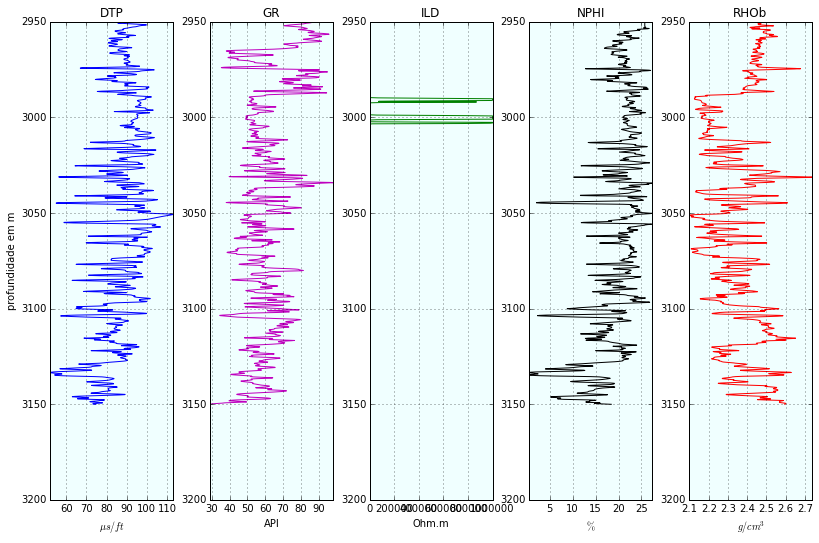

In [6]:
#--------------------------Transformando os dados em gráficos-------------------------------#

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')   

ax2.plot(DTP,prof,'-b',linewidth = 1) # repare que está DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('DTP')     # aqui o titulo 
ax2.set_xlabel('$\mu s/ft$')        # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')   # aqui o que representa o eixo y

plt.gca().invert_yaxis()              # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(DTP),xmin=min(DTP)) # aqui determinamos o valor maximo e minimo de DTP como limites do grafico
plt.grid()                            # adicionamos o grid    

#________________________________________________

ax3 = fig.add_subplot(6,6,2, axisbg='#F0FFFF') 
ax3.plot(GR,prof,'-m',linewidth = 1) # aqui é GR x prof, gamma ray(x) por profundidade(y)
ax3.set_title('GR')
ax3.set_xlabel('API')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(GR),xmin=min(GR))
plt.grid()

#_________________________________________________

ax4 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')
ax4.plot(ILD,prof,'-g',linewidth = 1)
ax4.set_title('ILD')
ax4.set_xlabel('Ohm.m')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(ILD),xmin=min(ILD))
plt.grid()

#_________________________________________________

ax5 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')
ax5.plot(PHIN,prof,'-k',linewidth = 1)
ax5.set_title('NPHI')
ax5.set_xlabel('$\%$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

#_________________________________________________

ax6 = fig.add_subplot(6,6,5, axisbg='#F0FFFF')
ax6.plot(RHOb,prof,'-r',linewidth = 1)
ax6.set_title('RHOb')
ax6.set_xlabel('$g/cm^3$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.grid()

plt.show()

In [7]:
#-------------------------------Raio Gamma-----------------------------------#

IGR = []   #Indice de Raio Gama
VSH = []   #Argilosidade Larionov

for i in range (len(GR)):
    if GR[i] == min(GR): 
        locmin = i                               # determina a posicao do valor minimo do Gama Ray no perfil
    if GR[i] == max(GR):
        locmax = i                               # determina a posicao do valor maximo do Gama Ray no perfil
        
print locmin,'posicao do GR min |',min(GR),'valor do GR min'
print locmax,'posicao do GR min |',max(GR),'valor do GR max'

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print
print mean(IGR),' media (IGR) - indice de raio gama'
print mean(VSH),' media (VSH) - quantidade de folhelho '

1312 posicao do GR min | 28.9712 valor do GR min
552 posicao do GR min | 98.00375 valor do GR max

0.466312567563  media (IGR) - indice de raio gama
0.225311517157  media (VSH) - quantidade de folhelho 


<br><center><font face="Times New ROman" size="6" color="#000000">- Porosidades -</font>

In [8]:
#-------------------------------Porosidade Total-----------------------------------#

RHOf   = 1.101  # g/cm3 para a agua salgada
DTPf   = 189.0  # us/feet para agua salgada

RHOma  = 2.65   # g/cm3 para o quartzo
DTPma  = 55.5   # us/feet para o quartzo

print RHOma, 'RHOma da matriz  |',RHOf,'RHOf do filtrado de lama'
print DTPma, 'dtma  da matriz  |',DTPf,'DTPf do filtrado de lama'

#-----------------------------------------------------------

PHItd = [] # Porosidade total - perfil densidade

for i in range (p):
    PHItd.append(100*(RHOb[i] - RHOma)/(RHOf - RHOma))       # Porosidade total - perfil densidade

print
print mean(PHItd),' media (PHItd) - porosidade total pelo perfil densidade em %'


PHIsh = [] # Porosidade aparente - folhelho

for i in range (p):
    PHIsh.append(PHIN[i] - PHItd[i])
    
print
print mean(PHIsh),' media (PHIsh)- porosidade aparente do folhelho pelo perfil densidade %'

#-------------------------------------------------------------------------------------------

for i in range (p):
    if PHIsh[i] == max(PHIsh):
        Psh = i
        
print Psh,' ponto de folhelho (Psh)'

RHOsh = RHOb[Psh]

print
print RHOsh, 'densidade do folhelho (RHOsh)'

2.65 RHOma da matriz  | 1.101 RHOf do filtrado de lama
55.5 dtma  da matriz  | 189.0 DTPf do filtrado de lama

19.0082199311  media (PHItd) - porosidade total pelo perfil densidade em %

0.909010129833  media (PHIsh)- porosidade aparente do folhelho pelo perfil densidade %
14  ponto de folhelho (Psh)

2.53737 densidade do folhelho (RHOsh)


In [9]:
#-------------------------------Porosidade Efetiva-----------------------------------#
PHIe = []
for i in range (p):
    PHIe.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh - RHOma)/(RHOf - RHOma)))*100)
    
print mean(PHIe),' media (PHIe) -  porosidade efetiva'

17.369947744  media (PHIe) -  porosidade efetiva


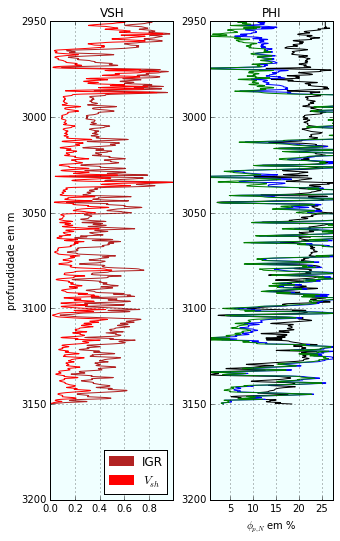

In [10]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax8.plot(IGR,prof,'-',linewidth = 1,color='#B22222')
ax8.plot(VSH,prof,'-',linewidth = 1,color='red')

ax8label1 = mpatches.Patch(label='IGR',color='#B22222')
ax8label2 = mpatches.Patch(label='$V_{sh}$',color='red')


ax8.set_title('VSH')
ax8.set_xlabel(' ')
ax8.set_ylabel('profundidade em m')

plt.legend(handles=[ax8label1, ax8label2],loc=4)
plt.xlim(xmax=max(VSH),xmin=min(VSH))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')

ax9.plot(PHIN,prof,'-k',linewidth = 1)
ax9.plot(PHItd,prof,'-b',linewidth = 1)
ax9.plot(PHIe,prof,'-g',linewidth = 1)
ax9.set_title('PHI')
ax9.set_xlabel('$\phi _{p,N}$ em %')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico -</font>

0.775281797587  - Siqueira - coeficiente de correlacao


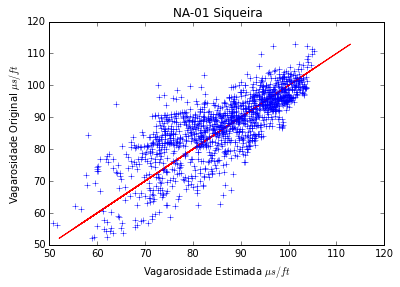

In [11]:
#-----------------------------------------Sonico Estimado-------------------------------------------
PHIs = max(PHIsh) #Usar essa porosidade aqui para estimar

DTPs = []

for i in range (p):
    
    DTPs.append(DTPma + (DTPf - DTPma)*((PHItd[i]/100.0) + (VSH[i]*(PHIs/100.0)))) # Sonico (Siqueira & Martins)
    
#---------------------------------------------------------------------------------------------------

ms   = mean(DTPs)
mdtp = mean(DTP)

CS = [] # correlacao Siqueira

SDS  = [] # Desvio Padrao
SDTP = [] # Desvio Padrao

for i in range (p):
    SDS.append ((DTPs[i] - ms)**2)
    SDTP.append((DTP[i]- mdtp)**2)
    
    CS.append((DTPs[i] - ms)*(DTP[i] - mdtp))
    
CS = sum(CS)

CS = CS/p

SDS  = sum(SDS)
SDS  = SDS/p
SDS  = np.sqrt(SDS)

SDTP  = sum(SDTP)
SDTP  = SDTP/p
SDTP  = np.sqrt(SDTP)

CorrS = CS/(SDS*SDTP)

print CorrS," - Siqueira - coeficiente de correlacao"  

plt.title('NA-01 Siqueira')
plt.plot(DTP,DTP,'-r')
plt.plot(DTPs,DTP,'+b')
plt.xlabel('Vagarosidade Estimada $\mu s / ft$')
plt.ylabel('Vagarosidade Original $\mu s / ft$')
plt.show()

0.579169312559  - Augusto - coeficiente de correlacao


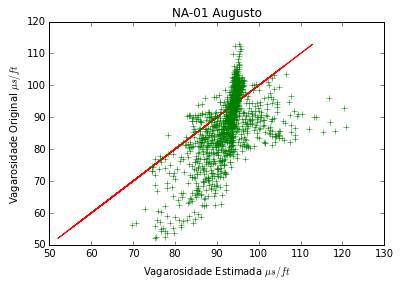

In [12]:
VPa = [] # Vp de augusto

cfvp0 = 3.2808*(10**(-6)) # fator de conversao 

for i in range (p): # determinando VPa em ms
    VPa.append(4.28 -(5.63*PHIe[i]/100.0) - (2.74*VSH[i]) + (9.24*(PHIe[i]/100.0)*VSH[i])+(6.76*(PHIe[i]/100)**2)+(0.85*VSH[i]**2)  )

DTPa = []
for i in range(p):
    VPa[i] = VPa[i]*1000.000
    #vp = 4.28 -(5.63*PHIe[i]/100)-(2.74*VSH[i])+(9.24*(PHIe[i]/100)*VSH[i])+(6.76*(PHIe[i]/100)**2)+(0.85*VSH[i]**2)
    #DTPa.append(304.8/vp)
    DTPa.append(1.0000/(cfvp0*VPa[i]))

#---------------------------------------------------------------------------------------------------

ma   = mean(DTPa)
mdtp = mean(DTP)

CA = [] # correlacao Augusto

SDA  = [] # Desvio Padrao
SDTP = [] # Desvio Padrao

for i in range (p):
    SDA.append ((DTPa[i] - ma)**2)
    SDTP.append((DTP[i]- mdtp)**2)
    
    CA.append((DTPa[i] - ma)*(DTP[i] - mdtp))
    
CA = sum(CA)

CA = CA/p

SDA  = sum(SDA)
SDA  = SDA/p
SDA  = np.sqrt(SDA)

SDTP  = sum(SDTP)
SDTP  = SDTP/p
SDTP  = np.sqrt(SDTP)

CorrA = CA/(SDA*SDTP)

print CorrA," - Augusto - coeficiente de correlacao"  

plt.title('NA-01 Augusto')
plt.plot(DTP,DTP,'-r')
plt.plot(DTPa,DTP,'+g')
plt.xlabel('Vagarosidade Estimada $\mu s / ft$')
plt.ylabel('Vagarosidade Original $\mu s / ft$')
plt.show()

In [13]:
#---------------------Impedancia---(transformado de pe pra m)----------------------------
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)

cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
    
VPs=[] # velocidade de onda P (Siqueira e Martins)
for i in range(p):
    VPs.append(1.0000/(cfvp*DTPs[i]))
    
#------------------------------------------Impedancia Acustica-----------------------------------#


z_imp = [] # Impedancia acustica (m/s).(g/cm3)
Z     = [] # Impedancia acustica (Km/s).(g/cm3)

z_imp_a = [] # Impedancia acustica Augusto  (m/s).(g/cm3)
z_imp_s = [] # Impedancia acustica Siqueira (m/s).(g/cm3)

Za = [] # Impedancia acustica Augusto (Km/s).(g/cm3)
Zs = [] # Impedancia acustica Siqueira(Km/s).(g/cm3)

for i in range (p):
    z_imp0 = (RHOsi[i]*VP[i]) # de olho no RHOsi e RHOb
    z_imp.append(z_imp0)
    Z.append(z_imp0*1000.000)
    
    z_imp0a = (RHOsi[i]*VPa[i]) # de olho no RHOsi e RHOb
    z_imp_a.append(z_imp0a)
    Za.append(z_imp0a*1000.000)
    
    z_imp0s = (RHOsi[i]*VPs[i]) # de olho no RHOsi e RHOb
    z_imp_s.append(z_imp0s)
    Zs.append(z_imp0s*1000.000)
    
#--------------------------------------------------------------------------------------------------------#   
    

    
#--------------------------------Refletividades---------------------

R  = [] # Refletividade
Rs = [] # Refletividade Siqueira
Ra = [] # Refletividade Augusto

for i in range (p):
    if i == 0:
        RR = 0
        RRs= 0
        RRa= 0
    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])
        RRs= (z_imp_s[i-1] - z_imp_s[i])/(z_imp_s[i-1] + z_imp_s[i])
        RRa= (z_imp_a[i-1] - z_imp_a[i])/(z_imp_a[i-1] + z_imp_a[i])
    R.append(RR)
    Rs.append(RRs)
    Ra.append(RRa)
    
zero_bar = [0]*p

print VPa[10]
print VPs[10]
print VP [10]

3209.57943718
3735.92548396
3063.29533821


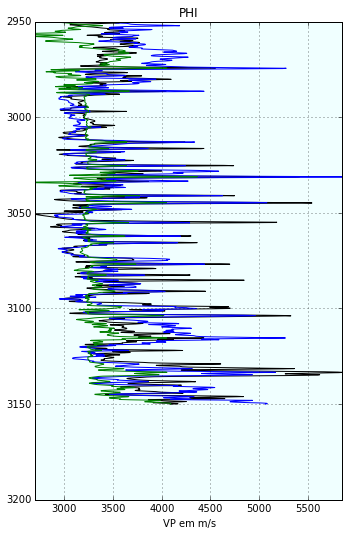

In [14]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (40,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax9.plot(VP,prof,'-k',linewidth = 1)
ax9.plot(VPs,prof,'-b',linewidth = 1)
ax9.plot(VPa,prof,'-g',linewidth = 1)
ax9.set_title('PHI')
ax9.set_xlabel('VP em m/s')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(VP),xmin=min(VP))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético -</font>

In [15]:
#------------------ velocidades VRMS --------------------#

DL = prof[3]-prof[2]# valor do intervalo em m

#--------------------------------------------------------#

#---------Padrao---------#
VRMS    = [0]*p
VRMS[0] = VP[0]
#--------Siqueira--------#
VRMSs    = [0]*p
VRMSs[0] = VPs[0]
#--------Augusto---------#
VRMSa    = [0]*p
VRMSa[0] = VPa[0]
#------------------------#

#--------------------------------------------------------#

#---------Padrao---------#
sssp = np.array([0.00]*p)
sssq = np.array([0.00]*p)
sssh = np.array([0.00]*p)
#--------Siqueira--------#
sssps = np.array([0.00]*p)
sssqs = np.array([0.00]*p)
ssshs = np.array([0.00]*p)
#--------Augusto---------#
ssspa = np.array([0.00]*p)
sssqa = np.array([0.00]*p)
sssha = np.array([0.00]*p)
#------------------------#

for i in range (p):
    #---------Padrao---------#
    sssp[i] = (DL)*(VP[i])
    sssq[i] = (DL)/(VP[i])
    sssh[i] = (DL)
    #--------Siqueira--------#
    sssps[i] = (DL)*(VPs[i])
    sssqs[i] = (DL)/(VPs[i])
    ssshs[i] = (DL)
    #--------Augusto---------#
    ssspa[i] = (DL)*(VPa[i])
    sssqa[i] = (DL)/(VPa[i])
    sssha[i] = (DL)
    #------------------------#

for i in range (1,p):
    #--------------Padrao--------------#
    sssp[i] = sssp[i-1] + (DL)*(VP[i])
    sssq[i] = sssq[i-1] + (DL)/(VP[i])
    sssh[i] = sssh[i-1] + (DL)
    #-------------Siqueira-------------#
    sssps[i] = sssps[i-1] + (DL)*(VPs[i])
    sssqs[i] = sssqs[i-1] + (DL)/(VPs[i])
    ssshs[i] = ssshs[i-1] + (DL)
    #-------------Augusto--------------#
    ssspa[i] = ssspa[i-1] + (DL)*(VPa[i])
    sssqa[i] = sssqa[i-1] + (DL)/(VPa[i])
    sssha[i] = sssha[i-1] + (DL)
    #----------------------------------#
    
#--------------------------------------------------------#

for i in range (p):
    VRMS[i] = np.sqrt(sssp[i]/sssq[i])
    VRMSs[i]= np.sqrt(sssps[i]/sssqs[i])
    VRMSa[i]= np.sqrt(ssspa[i]/sssqa[i])
    
VRMS[0]  = VP[0]
VRMSs[0] = VPs[0]
VRMSa[0] = VPa[0]
#------------------------------------------#
VMED  = [0]*p
VMEDs = [0]*p
VMEDa = [0]*p

for i in range (p):
    VMED[i]  = sssh[i]/sssq[i]
    VMEDs[i] = ssshs[i]/sssqs[i]
    VMEDa[i] = sssha[i]/sssqa[i]
    
VMED[0]  = VP[0]
VMEDs[0] = VPs[0]
VMEDa[0] = VPa[0]

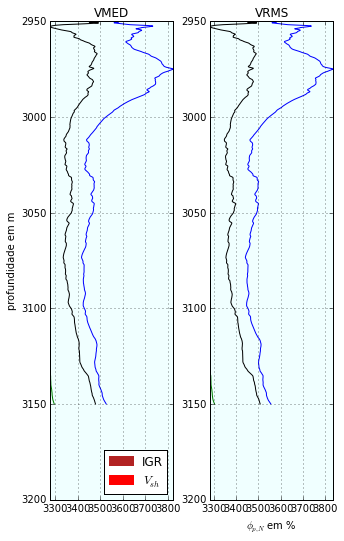

In [16]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax8.plot(VMED,prof,'-',linewidth = 1,color='k')
ax8.plot(VMEDs,prof,'-',linewidth = 1,color='b')
ax8.plot(VMEDa,prof,'-',linewidth = 1,color='g')

ax8label1 = mpatches.Patch(label='IGR',color='#B22222')
ax8label2 = mpatches.Patch(label='$V_{sh}$',color='red')


ax8.set_title('VMED')
ax8.set_xlabel(' ')
ax8.set_ylabel('profundidade em m')

plt.legend(handles=[ax8label1, ax8label2],loc=4)
plt.xlim(xmax=max(VMEDs),xmin=min(VMED))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')

ax9.plot(VRMS,prof,'-',linewidth = 1,color='k')
ax9.plot(VRMSs,prof,'-',linewidth = 1,color='b')
ax9.plot(VRMSa,prof,'-',linewidth = 1,color='g')

ax9.set_title('VRMS')
ax9.set_xlabel('$\phi _{p,N}$ em %')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(VRMSs),xmin=min(VRMS))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

In [17]:
#---------------------------------------------time c(t)-----------------------------#
T  = [] #tempo por intervalo
TD = []

for i in range (p):
    T.append(DL/VP[i])
    TD.append(DL/VP[i])
    
print np.mean(T),' = media de T em s'
print prof[p-1] - prof[0],'m = intervalo amostrado'

TT  = [] # linha de tempo
TTA = [] # linha de tempo acumulativa
for i in range (p):
    TT.append(np.mean(T) - 0.0759120306e-05) # ajuste do tempo
    TTA.append(np.mean(T) - 0.0759120306e-05)
    
    
profT0 = [] # nova profundidade - intervalar
profT  = [] # nova profundidade - acumulativa 

for i in range (p):
    profT0.append(TT[i]*VP[i])
    profT.append(TT[i]*VP[i])
    
print sum(profT0),'m = novo intervalo amostrado '

#-----------------------------parte acumulativa-------------------------------#

for i in range (1,p):
    TTA[i] = TTA[i-1]+TTA[i]
    profT[i] = profT[i-1]+profT[i]
    TD[i] = TD[i-1]+TD[i]
    
print mean(TT)
#print profT

for i in range(len(profT)):
    profT[i] = profT[i]+2950.0000
    
#print profT

4.38010742917e-05  = media de T em s
199.9488 m = intervalo amostrado
199.933199127 m = novo intervalo amostrado 
4.30419539857e-05


4.34740713488e-05 tempo 0
3.73159462326e-05 tempo p
4.38010742917e-05 media t


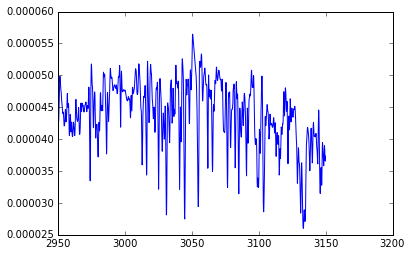

0.057510810545 4.34740713488e-05
2497.559091
0.0282785637686


In [18]:
#-----------------------------Tempo em milisegundo------------------------------

t0 = 2497.50 #tempo inicial em ms #

#-----------------------Tempo = Distancia/velocidade VMED------------------------
te  = [0]*p
tes = [0]*p
tea = [0]*p

te[0]  = t0
tes[0] = t0
tea[0] = t0

for i in range (1,p):
    te[i]  = te[i-1]  + (((2.00)*DL)/(VMED[i]))*1.0 
    tes[i] = tes[i-1] + (((2.00)*DL)/(VMEDs[i]))*1.0
    tea[i] = tea[i-1] + (((2.00)*DL)/(VMEDa[i]))*1.0
    
#-----------------------Tempo = Distancia/velocidade VRMS------------------------

tm  = [0]*p
tms = [0]*p
tma = [0]*p

tm[0]  = t0
tms[0] = t0
tma[0] = t0

for i in range (1,p):
    tm[i]  = tm[i-1]  + (((2.00)*DL)/(VRMS[i]))*1.0 
    tms[i] = tms[i-1] + (((2.00)*DL)/(VRMSs[i]))*1.0
    tma[i] = tma[i-1] + (((2.00)*DL)/(VRMSa[i]))*1.0

#-----------------------Tempo = Distancia/velocidade VP--------------------------
    
T  = [0]*p
TS = [0]*p
TA = [0]*p

for i in range (p):
    T[i]  = DL/VP[i]
    TS[i] = DL/VPs[i]
    TA[i] = DL/VPa[i]
    
T_medio = sum(T)/p  
print T[0],"tempo 0"    #!!!! AQUI !!!!!
print T[p-1],"tempo p"
print T_medio,"media t"

plt.plot(prof,T)
plt.show()

    
#-------------------------------Tempo acumulado VP-------------------------------    
    
Ta  = [0]*p
Tas = [0]*p
Taa = [0]*p

Ta[0]  = T[0]
Tas[0] = TS[0]
Taa[0] = TA[0]

for i in range (1,p):
    Ta[i]  = (Ta[i-1]+T[i])
    Tas[i] = (Tas[i-1]+TS[i])
    Taa[i] = (Taa[i-1]+TA[i])
    
print Ta[p-1],Ta[0]
    
for i in range (1,p):
    Ta[i]  = 2.0*Ta[i]
    Tas[i] = 2.0*Tas[i]
    Taa[i] = 2.0*Taa[i]

    
for i in range (p):    
    Ta[i]  = t0+(Ta[i])
    Tas[i] = t0+(Tas[i])
    Taa[i] = t0+(Taa[i])
    
print mean(Ta)
print mean(TTA)

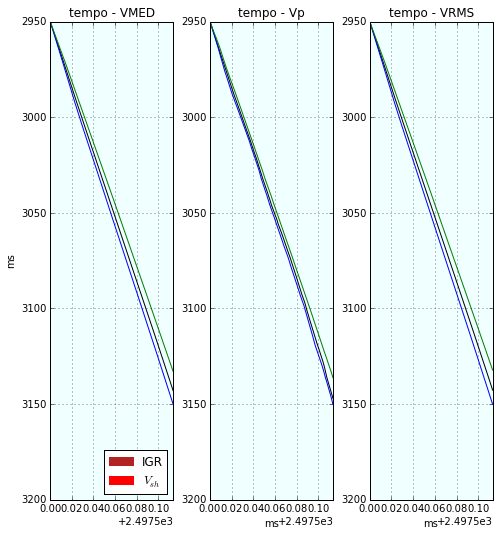

In [19]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax8.plot(te,prof,'-',linewidth = 1,color='k')
ax8.plot(tes,prof,'-',linewidth = 1,color='b')
ax8.plot(tea,prof,'-',linewidth = 1,color='g')

ax8label1 = mpatches.Patch(label='IGR',color='#B22222')
ax8label2 = mpatches.Patch(label='$V_{sh}$',color='red')


ax8.set_title('tempo - VMED')
ax8.set_xlabel(' ')
ax8.set_ylabel('ms')

plt.legend(handles=[ax8label1, ax8label2],loc=4)
plt.xlim(xmax=max(tes),xmin=min(te))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')

ax9.plot(Ta,prof,'-',linewidth = 1,color='k')
ax9.plot(Tas,prof,'-',linewidth = 1,color='b')
ax9.plot(Taa,prof,'-',linewidth = 1,color='g')

ax9.set_title('tempo - Vp')
ax9.set_xlabel('ms')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(Tas),xmin=min(Ta))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax10 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')

ax10.plot(tm,prof,'-',linewidth = 1,color='k')
ax10.plot(tms,prof,'-',linewidth = 1,color='b')
ax10.plot(tma,prof,'-',linewidth = 1,color='g')

ax10.set_title('tempo - VRMS')
ax10.set_xlabel('ms')

ax10label1 = mpatches.Patch(label='PHIN',color='k')
ax10label2 = mpatches.Patch(label='PHItd',color='b')
ax10label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(tms),xmin=min(tm))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

0.1524
4.38010742917e-05
2950.0556 2950.0556
3153.36142523 3150.0044


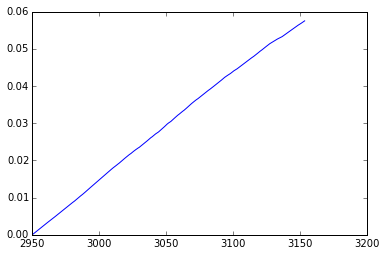

In [20]:
#-----------------------------Tempo em milisegundo------------------------------

print DL # Intervalo em metros
print T_medio # tempo medio VP

prof2_p = []    # intervalos VP padrao
prof3_p = [0]*p # profundiades

for i in range (p):
    prof2_p.append(VP[i]*T_medio)
    
prof3_p[0] = prof[0]

for i in range (1,p):
    prof3_p[i] = prof3_p[i-1] + prof2_p[i]


#-------------------------------------------------------------------------------

print prof3_p[0],prof[0]
print prof3_p[p-1],prof[p-1]

#-------------------------------------------------------------------------------

# T medio acumulativo

T_VP = [0]*p

T_VP[0] = T_medio

for i in range (1,p):
    T_VP[i] = T_VP[0]*(i+1)
    
    
    
plt.plot(prof3_p,T_VP)
plt.show()



------------------------
8.76357827885e-05 media ta - (tempo baseado em VP)
#----tempo VMED----#
8.99218484774e-05 media te  (tempo baseado em VMED padrao)
8.68217258082e-05 media tes (tempo baseado em VMED Siqueira)
9.47859085751e-05 media tea (tempo baseado em VMED Augusto)
#----tempo VRMS----#
8.95329432485e-05 media tm  (tempo baseado em VRMS padrao)
8.68217258082e-05 media tms (tempo baseado em VRMS Siqueira)
9.47859085751e-05 media tma (tempo baseado em VRMS Augusto)
------------------------



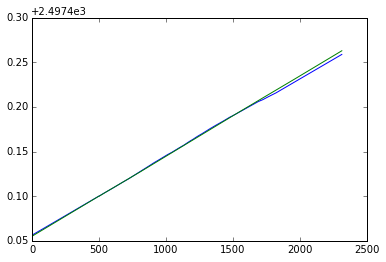

In [21]:
#teste

dif_ta  = []
#----tempo VMED----#
dif_te  = []
dif_tes = []
dif_tea = []
#----tempo VRMS----#
dif_tm  = []
dif_tms = []
dif_tma = []


for i in range(p-1):
    dif_ta.append(- Ta[i] + Ta[i+1])
    #-----------tempo VMED------------#
    dif_te.append(-   te[i] +  te[i+1])
    dif_tes.append(- tes[i] + tes[i+1])
    dif_tea.append(- tea[i] + tea[i+1])
    #-----------tempo VRMS------------#
    dif_tm.append(-  tm[i]  +  tm[i+1])
    dif_tms.append(- tes[i] + tes[i+1])
    dif_tma.append(- tea[i] + tea[i+1])
    
#--------------------------------------------------------------------------------
    
med_ta  = np.mean(dif_ta)
#----tempo VMED----#
med_te  = np.mean(dif_te)
med_tes = np.mean(dif_tes)
med_tea = np.mean(dif_tea)
#----tempo VRMS----#
med_tm  = np.mean(dif_tm)
med_tms = np.mean(dif_tms)
med_tma = np.mean(dif_tma)

#--------------------------------------------------------------------------------
print
print '------------------------'
print med_ta,'media ta - (tempo baseado em VP)'
print '#----tempo VMED----#'
print med_te, 'media te  (tempo baseado em VMED padrao)'
print med_tes,'media tes (tempo baseado em VMED Siqueira)'
print med_tea,'media tea (tempo baseado em VMED Augusto)'
print '#----tempo VRMS----#'
print med_tm, 'media tm  (tempo baseado em VRMS padrao)'
print med_tms,'media tms (tempo baseado em VRMS Siqueira)'
print med_tma,'media tma (tempo baseado em VRMS Augusto)'
print '------------------------'
print
#--------------------------------------------------------------------------------

ta_front = [] # decrescente (primeiro termo menor que o segundo)
ta_back  = [] # crescente   (primeiro termo maior que o segundo)
count    = []
#----tempo VMED----#
te_front  = [];te_back  = []
tes_front = [];tes_back = []
tea_front = [];tea_back = []
#----tempo VRMS----#
tm_front  = [];tm_back  = []
tms_front = [];tms_back = []
tma_front = [];tma_back = []

#--------------------------------------------------------------------------------

extra_time = 500

for i in range (extra_time):
    ta_back.append(Ta[1] - (med_ta*i))
    ta_front.append(Ta[p-1] + (med_ta*i))
    count.append(i)
    #---------------------------------------#
    #----tempo VMED P----#
    te_back.append(te[1] - (med_te*i))
    te_front.append(te[p-1] + (med_te*i))
    #----tempo VMED S----#
    tes_back.append(tes[1] - (med_tes*i))
    tes_front.append(tes[p-1] + (med_tes*i))
    #----tempo VMED A----#
    tea_back.append(tea[1] - (med_tea*i))
    tea_front.append(tea[p-1] + (med_tea*i))
    #---------------------------------------#
    #----tempo VRMS P----#
    tm_back.append(tm[1] - (med_tm*i))
    tm_front.append(tm[p-1] + (med_tm*i))
    #----tempo VRMS S----#
    tms_back.append(tms[1] - (med_tms*i))
    tms_front.append(tms[p-1] + (med_tms*i))
    #----tempo VRMS A----#
    tma_back.append(tma[1] - (med_tma*i))
    tma_front.append(tma[p-1] + (med_tma*i))
    #---------------------------------------#

#--------------------------------------------------------------------------------
    
ta_back.reverse()
#----tempo VMED----#
te_back.reverse()
tes_back.reverse()
tea_back.reverse()
#----tempo VRMS----#
tm_back.reverse()
tms_back.reverse()
tma_back.reverse()

#--------------------------------------------------------------------------------

ta2  = ta_back
#----tempo VMED----#
te2  = te_back
tes2 = tes_back
tea2 = tea_back
#----tempo VRMS----#
tm2  = tm_back
tms2 = tms_back
tma2 = tma_back
 
for i in range (p):
    ta2.append(Ta[i])
    #----tempo VMED----#
    te2.append(te[i])
    tes2.append(tes[i])
    tea2.append(tea[i])
    #----tempo VRMS----#
    tm2.append(tm[i])
    tms2.append(tms[i])
    tma2.append(tma[i])
    
for i in range (extra_time):
    ta2.append(ta_front[i])
    #----tempo VMED----#
    te2.append(te_front[i])
    tes2.append(tes_front[i])
    tea2.append(tea_front[i])
    #----tempo VRMS----#
    tm2.append(tm_front[i])
    tms2.append(tms_front[i])
    tma2.append(tma_front[i])

#--------------------------------------------------------------------------------


count2 = []
for i in range (len(ta2)):
    count2.append(i)

plt.plot(count2,ta2)
plt.plot(count2,te2)
plt.show()

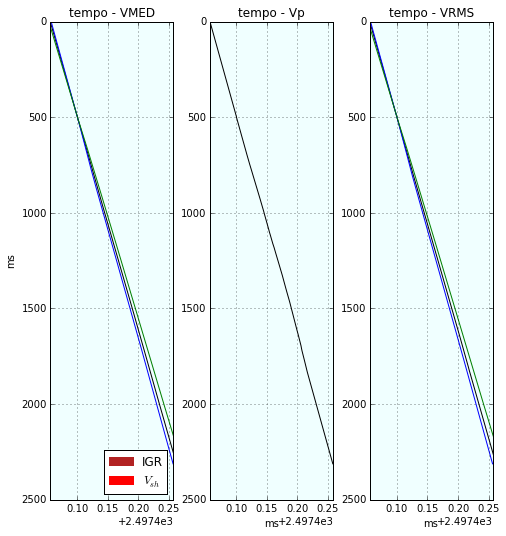

In [22]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax8.plot(te2,count2,'-',linewidth = 1,color='k')
ax8.plot(tes2,count2,'-',linewidth = 1,color='b')
ax8.plot(tea2,count2,'-',linewidth = 1,color='g')

ax8label1 = mpatches.Patch(label='IGR',color='#B22222')
ax8label2 = mpatches.Patch(label='$V_{sh}$',color='red')


ax8.set_title('tempo - VMED')
ax8.set_xlabel(' ')
ax8.set_ylabel('ms')

plt.legend(handles=[ax8label1, ax8label2],loc=4)
plt.xlim(xmax=max(tes2),xmin=min(te2))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')

ax9.plot(ta2,count2,'-',linewidth = 1,color='k')

ax9.set_title('tempo - Vp')
ax9.set_xlabel('ms')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(ta2),xmin=min(ta2))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax10 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')

ax10.plot(tm2,count2,'-',linewidth = 1,color='k')
ax10.plot(tms2,count2,'-',linewidth = 1,color='b')
ax10.plot(tma2,count2,'-',linewidth = 1,color='g')

ax10.set_title('tempo - VRMS')
ax10.set_xlabel('ms')

ax10label1 = mpatches.Patch(label='PHIN',color='k')
ax10label2 = mpatches.Patch(label='PHItd',color='b')
ax10label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(tms2),xmin=min(tm2))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

2497.45644579
-2454.92621309
-0.0
2313
2313


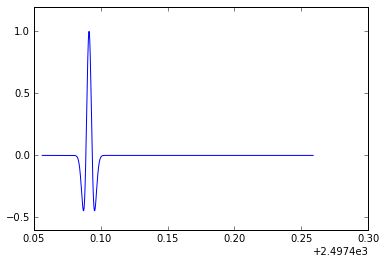

0.0


In [23]:
#teste2 wavlet

print ta2[0]
A = 1.000000
f = 30.000 # 133
j = 400
wav = []
for i in range (len(ta2)):
    a = A*np.pi*f
    EE1a = -(np.pi**2)*(a**2)*((ta2[i] - ta2[0] - (ta2[j] - ta2[1]) )**2)
    wav01 = (1 - (2*(np.pi**2)) * (a**2) * ((ta2[i] - ta2[0] - (ta2[j] - ta2[1]) )**2))*np.exp(EE1a) # 2497.55919007
    wav.append(wav01)
    


print EE1a
print wav01
print len(ta2)
print len(wav)
plt.plot(ta2,wav)
#plt.ylim(ymax=1,ymin=0.5)
plt.show()

print np.exp(EE1a)

In [24]:
'''
# teste 3 

A2 = 1.000000
f2 = 30.000 # 133
wav2 = []
for j in range (len(ta2)):
    for i in range (len(ta2)):
        a2 = A2*np.pi*f2
        EE2a = -(np.pi**2)*(a2**2)*((ta2[i] - ta2[0] - (ta2[j] - ta2[0]) )**2)
        wav02 = (1 - (2*(np.pi**2)) * (a2**2) * ((ta2[i] - ta2[0] - (ta2[j] - ta2[0]) )**2))*np.exp(EE2a) # 2497.55919007
        wav2.append(wav02)
        
wav3 = np.array(np.reshape(wav2,(len(ta2),len(ta2))),float)
wav4 = sum(wav3,axis=0)

plt.plot(ta2,wav4)
plt.show()
'''

'\n# teste 3 \n\nA2 = 1.000000\nf2 = 30.000 # 133\nwav2 = []\nfor j in range (len(ta2)):\n    for i in range (len(ta2)):\n        a2 = A2*np.pi*f2\n        EE2a = -(np.pi**2)*(a2**2)*((ta2[i] - ta2[0] - (ta2[j] - ta2[0]) )**2)\n        wav02 = (1 - (2*(np.pi**2)) * (a2**2) * ((ta2[i] - ta2[0] - (ta2[j] - ta2[0]) )**2))*np.exp(EE2a) # 2497.55919007\n        wav2.append(wav02)\n        \nwav3 = np.array(np.reshape(wav2,(len(ta2),len(ta2))),float)\nwav4 = sum(wav3,axis=0)\n\nplt.plot(ta2,wav4)\nplt.show()\n'

In [25]:
'''
# teste 4

A3 = 1.000000
f3 = 130.000 # 133
wav_te = []
for j in range (len(te2)):
    for i in range (len(te2)):
        a3 = A3*np.pi*f3
        EE_te = -(np.pi**2)*(a3**2)*((te2[i] - te2[0] - (te2[j] - te2[0]) )**2)
        wav_te_0 = (1 - (2*(np.pi**2)) * (a3**2) * ((te2[i] - te2[0] - (te2[j] - te2[0]) )**2))*np.exp(EE_te)
        wav_te.append(wav_te_0)
        
wav_te2 = np.array(np.reshape(wav_te,(len(te2),len(te2))),float)
wav_te3 = sum(wav_te2,axis=0)

plt.plot(te2,wav_te3)
plt.show()
print wav_te3[500]
'''

'\n# teste 4\n\nA3 = 1.000000\nf3 = 130.000 # 133\nwav_te = []\nfor j in range (len(te2)):\n    for i in range (len(te2)):\n        a3 = A3*np.pi*f3\n        EE_te = -(np.pi**2)*(a3**2)*((te2[i] - te2[0] - (te2[j] - te2[0]) )**2)\n        wav_te_0 = (1 - (2*(np.pi**2)) * (a3**2) * ((te2[i] - te2[0] - (te2[j] - te2[0]) )**2))*np.exp(EE_te)\n        wav_te.append(wav_te_0)\n        \nwav_te2 = np.array(np.reshape(wav_te,(len(te2),len(te2))),float)\nwav_te3 = sum(wav_te2,axis=0)\n\nplt.plot(te2,wav_te3)\nplt.show()\nprint wav_te3[500]\n'

In [26]:
W1 = []
W2 = []
Val  = 5

for j in range (Val):
    for i in range (Val):
        W1.append(i+j)
    
print W1
W2 = np.array(np.reshape(W1,(Val,Val)),float)
print W2
W3 = sum(W2,axis=0)
print W3
#----------------------------------------------------------------#

G1 = []
G2 = []
RR = [-1,2,-1,2,-1]

for j in range (Val):
    for i in range (Val):
        G1.append((i+j)*RR[i])
G2 = np.array(np.reshape(G1,(Val,Val)),float)
print G2
#-----------------------teste acumulação-------------------------#

EEE1 = [1.1,1.5,1.3,1.1,1.2,1.3]
EEE2 = [1.1,1.5,1.3,1.1,1.2,1.3]

for i in range (1,len(EEE1)):
    EEE1[i] = EEE1[i-1]+EEE1[i]
    EEE2[i] = EEE2[i-1]-EEE2[i]
    
EEE2.reverse()    

print EEE1
print EEE2

#-----------------------------------------------------------------#

[0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 3, 4, 5, 6, 7, 4, 5, 6, 7, 8]
[[ 0.  1.  2.  3.  4.]
 [ 1.  2.  3.  4.  5.]
 [ 2.  3.  4.  5.  6.]
 [ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]]
[ 10.  15.  20.  25.  30.]
[[  0.   2.  -2.   6.  -4.]
 [ -1.   4.  -3.   8.  -5.]
 [ -2.   6.  -4.  10.  -6.]
 [ -3.   8.  -5.  12.  -7.]
 [ -4.  10.  -6.  14.  -8.]]
[1.1, 2.6, 3.9000000000000004, 5.0, 6.2, 7.5]
[-5.3, -4.0, -2.8, -1.7, -0.3999999999999999, 1.1]


In [27]:
# VMED

it_VMED0 = [0]*p # intervalo de tempo de VMED; te = tempo

for i in range (1,p):
    it_VMED0[i] = te[i] - te[i-1] # te = t baseado em VMED padrao.

it_VMED = [0]*p

for i in range (p-1):
    it_VMED[i] = it_VMED0[i-1] # fazendo com que o primeiro termo nao seja 0
    

#-------------------------------------------------------------------#    

it_VMED_B0 = it_VMED # intervalo de tempo extra de VMED
it_VMED_F0 = it_VMED

for i in range (1,extra_time):
    it_VMED_F0[i] = it_VMED_F0[i-1]+it_VMED_F0[i]
    it_VMED_B0[i] = it_VMED_B0[i-1]+it_VMED_B0[i]

it_VMED_B0.reverse()

#-------------------------------------------------------------#

it_VMED_B1 = [] # intervalo de tempo extra de VMED
it_VMED_F1 = []

for i in range (extra_time):
    it_VMED_F1.append(it_VMED_F0[i] + te[p-1])
    it_VMED_B1.append(it_VMED_B0[i] + te[0])

tee = it_VMED_B1

for i in range (len(te)):
    tee.append(te[i])
    
for i in range (len(it_VMED_F1)):
    tee.append(it_VMED_F1[i])
    
print len(tee)

# ---------------------------------------------------#


RF = [2.0]*extra_time
RB = [2.0]*extra_time

R2 = RB

for i in range(p):
    R2.append(R[i])

    
for i in range(len(RF)):
    R2.append(RF[i])
    
print len(R2)
print R2[700]
# extra_time

2313
2313
0.0287262930728


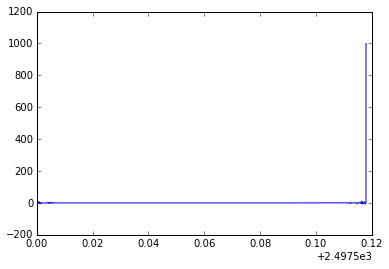

0.0


In [28]:
# teste 5

A3 = 1.000000
f3 = 30.000 # 133
wav_te = []
wav_conv = []
for j in range (len(tee)):
    for i in range (len(tee)):
        a3 = A3*np.pi*f3
        EE_te = -(np.pi**2)*(a3**2)*((tee[i] - tee[0] - (tee[j] - tee[0]) )**2)
        wav_te_0 = R2[i]*((1 - (2*(np.pi**2)) * (a3**2) * ((tee[i] - tee[0] - (tee[j] - tee[0]) )**2))*np.exp(EE_te))
        wav_te.append(wav_te_0)
        
wav_te2 = np.array(np.reshape(wav_te,(len(tee),len(tee))),float)
wav_te3 = sum(wav_te2,axis=0)

plt.plot(tee,wav_te3)
plt.show()

print wav_te3[500]

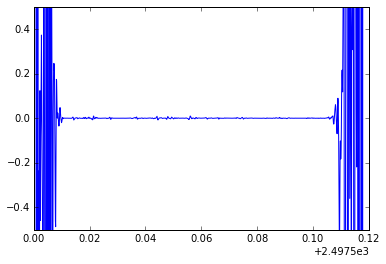

0.0
2313
0.00263198450175


In [29]:
plt.plot(tee,wav_te3)
plt.ylim(ymax=0.5,ymin=-0.5)
plt.show()

print wav_te3[500]

print len(wav_te3)

print wav_te3[700]

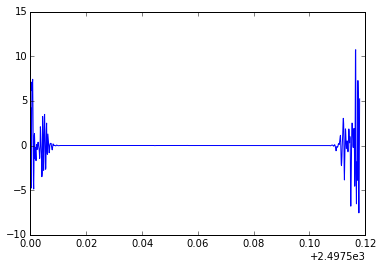

In [30]:
wavleti2 = []

for i in range(500,1813):
    wavleti2.append(wav_te3[i])
    
plt.plot(te,wavleti2)
plt.show()



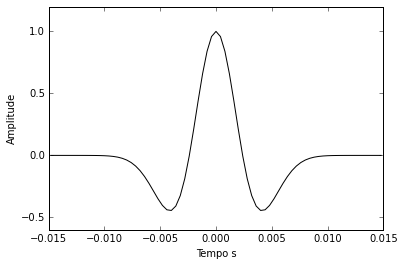

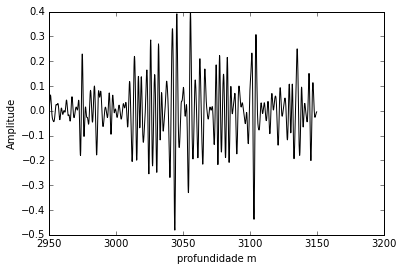

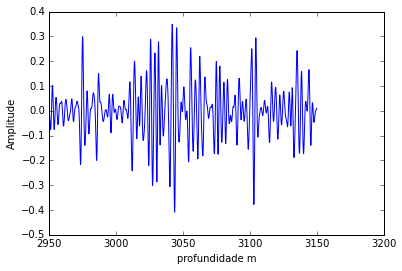

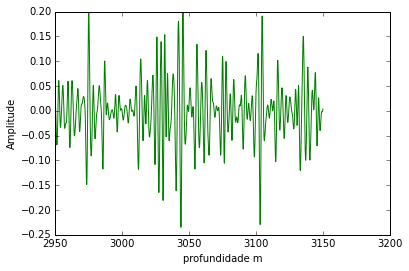

In [31]:
#-------------------------------------Padrao-------------------------------------

dt = 4.00 # ms (diferenca de tempo em media)
nw = 75   # numero de interacoes
freq = 30 # Hz

#-------------------------------------Padrao-------------------------------------

tt  = [] # Escala de tempo
wav = [] # Wavlet (Richer no caso)

for i in range(nw):
    
    t = (i-37.00)*(dt)*(0.0001)                                   # 37 = 75/2
    tt.append(t)                                                  # incorporando ao tempo
    #------------------------------------------------------------------------------------
    a = freq*np.pi                                                # Amplitude
    EE1 = -(np.pi**2)*(a**2)*((t)**2)                             #parte exponencial
    psi_01 = (1 - (2*(np.pi**2)) * (a**2) * ((t)**2))*np.exp(EE1) # restante da operacao
    #------------------------------------------------------------------------------------
    wav.append(psi_01) 

plt.plot(tt,wav,'-k')
plt.xlabel('Tempo s')
plt.ylabel('Amplitude')
plt.show()

signal  = np.convolve(R,wav,'same')  # wavlet convolucao Padrao
signals = np.convolve(Rs,wav,'same') # wavlet convolucao Siqueira
signala = np.convolve(Ra,wav,'same') # wavlet convolucao Augusto

plt.plot(prof,signal,'-k')
plt.xlabel('profundidade m')
plt.ylabel('Amplitude')
plt.show()

plt.plot(prof,signals,'-b')
plt.xlabel('profundidade m')
plt.ylabel('Amplitude')
plt.show()

plt.plot(prof,signala,'-g')
plt.xlabel('profundidade m')
plt.ylabel('Amplitude')
plt.show()

#------------------------------------Siqueira------------------------------------


In [32]:
#------------------------diferenca velocidades--------------------------#

difVPVPa = [] # Diferenca absoluta VP - VPa
difVPVPs = [] # Diferenca absoluta VP - VPs

relVPVPa = [] # Diferenca relativa VP - VPa
relVPVPs = [] # Diferenca relativa VP - VPs

for i in range (p):
    difVPVPa.append(np.sqrt((VPa[i] - VP[i])**2))
    difVPVPs.append(np.sqrt((VPs[i] - VP[i])**2))
    
    relVPVPa.append(100.0*np.sqrt((((VP[i] - VPa[i])/VP[i]))**2))
    relVPVPs.append(100.0*np.sqrt((((VP[i] - VPs[i])/VP[i]))**2))

In [33]:
IMPfl = RHOf/DTPf
IMPma = RHOma/DTPma
print IMPfl,IMPma

for i in range(p):
    if prof[i] > 3038 and prof[i] < 3039:
        print i
        


0.0058253968254 0.0477477477477
578
579
580
581
582
583


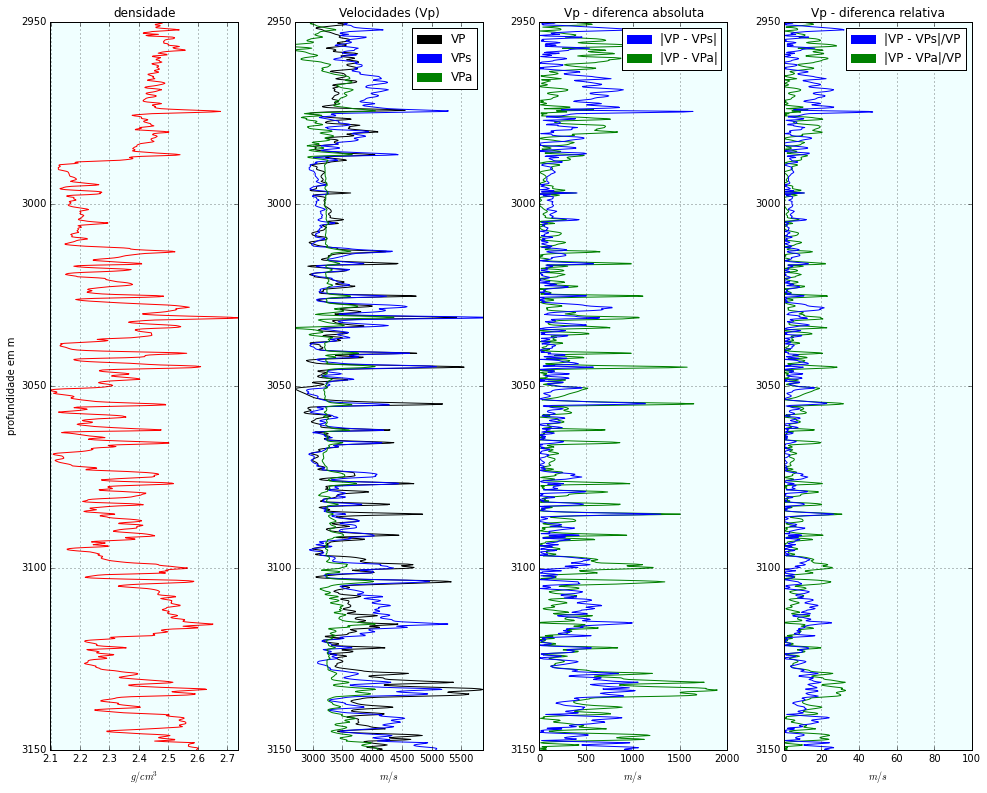

In [34]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')

ax8.plot(RHOb,prof,'-',linewidth = 1,color='r')


ax8.set_title('densidade')
ax8.set_xlabel('$g/cm^3$')
ax8.set_ylabel('profundidade em m')

plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax7 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')


ax7.plot(VP,prof,'-k',linewidth = 1)  #
ax7.plot(VPs,prof,'-b',linewidth = 1) #
ax7.plot(VPa,prof,'-g',linewidth = 1) #VRMS
ax7.set_title('Velocidades (Vp)')
ax7.set_xlabel('$m/s$')

ax7label1 = mpatches.Patch(label='VP' ,color='k')
ax7label2 = mpatches.Patch(label='VPs',color='b')
ax7label3 = mpatches.Patch(label='VPa',color='g')

plt.legend(handles=[ax7label1, ax7label2, ax7label3],loc=1)
plt.xlim(xmax=max(VP),xmin=min(VP))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax6 = fig.add_subplot(4,4,3, axisbg='#F0FFFF')

ax6.plot(difVPVPa,prof,'-g',linewidth = 1) # augusto
ax6.plot(difVPVPs,prof,'-b',linewidth = 1) # siqueira
ax6.set_title('Vp - diferenca absoluta')
ax6.set_xlabel('$m/s$')

ax6label1 = mpatches.Patch(label='|VP - VPs|' ,color='b')
ax6label2 = mpatches.Patch(label='|VP - VPa|',color='g')

plt.legend(handles=[ax6label1, ax6label2],loc=1)
#plt.xlim(xmax=max(difVPVPs),xmin=min(difVPVPs))
plt.xlim(xmax=2000,xmin=0)
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax6 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')

ax6.plot(relVPVPa,prof,'-g',linewidth = 1) # augusto
ax6.plot(relVPVPs,prof,'-b',linewidth = 1) # siqueira
ax6.set_title('Vp - diferenca relativa')
ax6.set_xlabel('$m/s$')

ax6label1 = mpatches.Patch(label='|VP - VPs|/VP' ,color='b')
ax6label2 = mpatches.Patch(label='|VP - VPa|/VP',color='g')

plt.legend(handles=[ax6label1, ax6label2],loc=1)
#plt.xlim(xmax=max(difVPVPs),xmin=min(difVPVPs))
plt.xlim(xmax=100,xmin=0)
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()



plt.show()

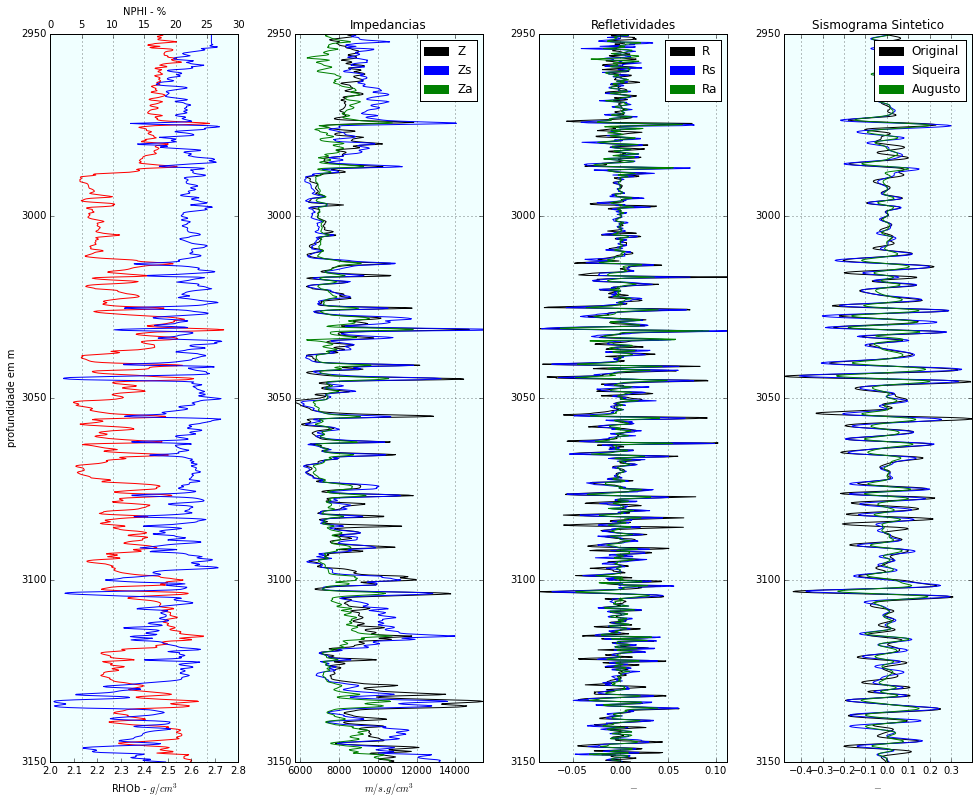

In [35]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')

ax8.plot(RHOb,prof,'-r',linewidth = 1)
ax8.set_xlabel('RHOb - $g/cm^3$')

ax9 = ax8.twiny()

ax9.plot(PHIN,prof,'-b',linewidth = 1)
ax9.set_xlabel('NPHI - %')

ax8.set_ylabel('profundidade em m')

#plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax7 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')


ax7.plot(Z,prof,'-k',linewidth = 1)  #
ax7.plot(Zs,prof,'-b',linewidth = 1) #
ax7.plot(Za,prof,'-g',linewidth = 1) #VRMS
ax7.set_title('Impedancias')
ax7.set_xlabel('$ m/s. g/cm^3 $')

ax7label1 = mpatches.Patch(label='Z' ,color='k')
ax7label2 = mpatches.Patch(label='Zs',color='b')
ax7label3 = mpatches.Patch(label='Za',color='g')

plt.legend(handles=[ax7label1, ax7label2, ax7label3],loc=1)
plt.xlim(xmax=max(Z),xmin=min(Z))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax6 = fig.add_subplot(4,4,3, axisbg='#F0FFFF')

ax6.plot(R,prof,'-k',linewidth = 1)  #
ax6.plot(Rs,prof,'-b',linewidth = 1) #
ax6.plot(Ra,prof,'-g',linewidth = 1) #VRMS
ax6.set_title('Refletividades')
ax6.set_xlabel('$-$')

ax6label1 = mpatches.Patch(label='R' ,color='k')
ax6label2 = mpatches.Patch(label='Rs',color='b')
ax6label3 = mpatches.Patch(label='Ra',color='g')

plt.legend(handles=[ax6label1, ax6label2, ax6label3],loc=1)
plt.xlim(xmax=max(R),xmin=min(R))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax6 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')

ax6.plot(signal,prof,'-k',linewidth = 1)  #
ax6.plot(signals,prof,'-b',linewidth = 1) #
ax6.plot(signala,prof,'-g',linewidth = 1) #VRMS
ax6.set_title('Sismograma Sintetico')
ax6.set_xlabel('$-$')

ax6label1 = mpatches.Patch(label='Original' ,color='k')
ax6label2 = mpatches.Patch(label='Siqueira',color='b')
ax6label3 = mpatches.Patch(label='Augusto',color='g')

plt.legend(handles=[ax6label1, ax6label2, ax6label3],loc=1)
plt.xlim(xmax=max(signal),xmin=min(signal))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()



plt.show()

In [36]:
#---------------------------------Medidas-Estatisticas------------------------------------#
medVP = np.mean(VP) # media
maxVP = max    (VP) # maximo
minVP = min    (VP) # minimo
varVP = np.var (VP) # variancia
stdVP = np.std (VP) # desvio padrao
#----------------------------------------------#
print "-----------valores de VP-------------"
print medVP,"m/s   - media "
print maxVP,"m/s   - valor maximo"
print minVP,"m/s   - valor minimo"
print varVP,"m²/s² - variancia"
print stdVP,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPa = np.mean(VPa) # media
maxVPa = max    (VPa) # maximo
minVPa = min    (VPa) # minimo
varVPa = np.var (VPa) # variancia
stdVPa = np.std (VPa) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPa------------"
print medVPa,"m/s   - media "
print maxVPa,"m/s   - valor maximo"
print minVPa,"m/s   - valor minimo"
print varVPa,"m²/s² - variancia"
print stdVPa,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPs = np.mean(VPs) # media
maxVPs = max    (VPs) # maximo
minVPs = min    (VPs) # minimo
varVPs = np.var (VPs) # variancia
stdVPs = np.std (VPs) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPs------------"
print medVPs,"m/s   - media "
print maxVPs,"m/s   - valor maximo"
print minVPs,"m/s   - valor minimo"
print varVPs,"m²/s² - variancia"
print stdVPs,"m/s   - desvio padrao"
print "-------------------------------------"
print
print "------------Erro Absoluto------------"
medeaVPVPa = np.mean(difVPVPa) # media
maxeaVPVPa = max    (difVPVPa) # maximo
mineaVPVPa = min    (difVPVPa) # minimo
vareaVPVPa = np.var (difVPVPa) # variancia
stdeaVPVPa = np.std (difVPVPa) # desvio padrao
#----------------------------------------------#
print "---------valores de eaVPVPa----------"
print medeaVPVPa,"m/s   - media "
print maxeaVPVPa,"m/s   - valor maximo"
print mineaVPVPa,"m/s   - valor minimo"
print vareaVPVPa,"m²/s² - variancia"
print stdeaVPVPa,"m/s   - desvio padrao"
print "-------------------------------------"
medeaVPVPs = np.mean(difVPVPs) # media
maxeaVPVPs = max    (difVPVPs) # maximo
mineaVPVPs = min    (difVPVPs) # minimo
vareaVPVPs = np.var (difVPVPs) # variancia
stdeaVPVPs = np.std (difVPVPs) # desvio padrao
#----------------------------------------------#
print "---------valores de eaVPVPs----------"
print medeaVPVPs,"m/s   - media "
print maxeaVPVPs,"m/s   - valor maximo"
print mineaVPVPs,"m/s   - valor minimo"
print vareaVPVPs,"m²/s² - variancia"
print stdeaVPVPs,"m/s   - desvio padrao"
print "-------------------------------------"
print
print "------------Erro relativo------------"
mederVPVPa = np.mean(relVPVPa) # media
maxerVPVPa = max    (relVPVPa) # maximo
minerVPVPa = min    (relVPVPa) # minimo
varerVPVPa = np.var (relVPVPa) # variancia
stderVPVPa = np.std (relVPVPa) # desvio padrao
#----------------------------------------------#
print "---------valores de erVPVPa----------"
print mederVPVPa,"m/s   - media "
print maxerVPVPa,"m/s   - valor maximo"
print minerVPVPa,"m/s   - valor minimo"
print varerVPVPa,"m²/s² - variancia"
print stderVPVPa,"m/s   - desvio padrao"
print "-------------------------------------"
mederVPVPs = np.mean(relVPVPs) # media
maxerVPVPs = max    (relVPVPs) # maximo
minerVPVPs = min    (relVPVPs) # minimo
varerVPVPs = np.var (relVPVPs) # variancia
stderVPVPs = np.std (relVPVPs) # desvio padrao
#----------------------------------------------#
print "---------valores de erVPVPs----------"
print mederVPVPs,"m/s   - media "
print maxerVPVPs,"m/s   - valor maximo"
print minerVPVPs,"m/s   - valor minimo"
print varerVPVPs,"m²/s² - variancia"
print stderVPVPs,"m/s   - desvio padrao"
print "-------------------------------------"

-----------valores de VP-------------
3537.75872092 m/s   - media 
5858.64661552 m/s   - valor maximo
2699.29323668 m/s   - valor minimo
245940.848839 m²/s² - variancia
495.924236995 m/s   - desvio padrao
-------------------------------------
-----------valores de VPa------------
3309.43446979 m/s   - media 
4366.75627105 m/s   - valor maximo
2521.48420487 m/s   - valor minimo
45737.5025693 m²/s² - variancia
213.863280086 m/s   - desvio padrao
-------------------------------------
-----------valores de VPs------------
3586.46773784 m/s   - media 
6016.36952946 m/s   - valor maximo
2896.99528948 m/s   - valor minimo
238317.365913 m²/s² - variancia
488.177596693 m/s   - desvio padrao
-------------------------------------

------------Erro Absoluto------------
---------valores de eaVPVPa----------
313.860470202 m/s   - media 
1892.76805407 m/s   - valor maximo
0.108406481682 m/s   - valor minimo
108699.844937 m²/s² - variancia
329.696595277 m/s   - desvio padrao
--------------------------

In [37]:
#------------------------




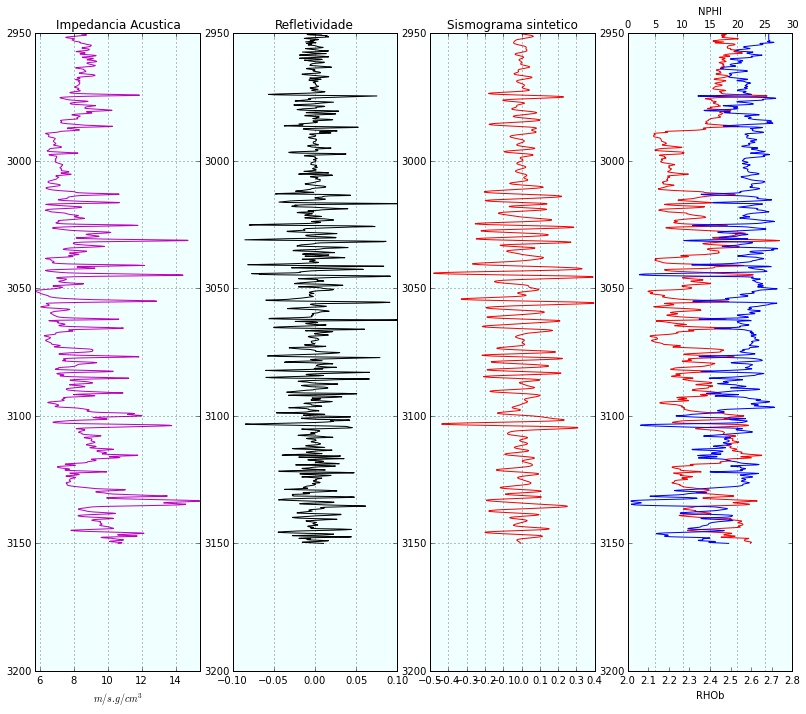

In [38]:
#---------------------Graficos 3-------------------------------

fig = plt.figure(figsize= (20,80))
fig.subplots_adjust(left=0.1, wspace=0.2)

#----------------------------------------------------------
ax21 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax21.plot(z_imp,prof,'-m',linewidth = 1)

ax21.set_title('Impedancia Acustica')
ax21.set_xlabel('$ m/s. g/cm^3 $')

plt.xlim(xmax=max(z_imp),xmin=min(z_imp))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax22 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')

ax22.plot(R,prof,'-k',linewidth = 1)

ax22.set_title('Refletividade')
ax22.set_xlabel(' ')

plt.xlim(xmax=0.10,xmin=-0.10)
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------
ax22 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')

ax22.plot(signal,prof,'-r',linewidth = 1)

ax22.set_title('Sismograma sintetico')
ax22.set_xlabel(' ')

#plt.xlim(xmax=max(VP),xmin=min(VP))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------
ax23 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')

ax23.plot(RHOb,prof,'-r',linewidth = 1)
#ax23.xlim(xmax=2.95,xmin=1.95)
ax23.set_xlabel('RHOb')

ax24 = ax23.twiny()

ax24.plot(PHIN,prof,'-b',linewidth = 1)
ax24.set_xlabel('NPHI')


plt.grid()

plt.gca().invert_yaxis()

plt.show()

In [39]:
#-----------------------------------------Porosidade Sonica-------------------------------------------

PHIts = []
PHIes = []
gas   = []

DTPsh = DTP[Psh]
for i in range (p):
    
    PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh - DTPma)/(DTPf - DTPma))))*100.00)

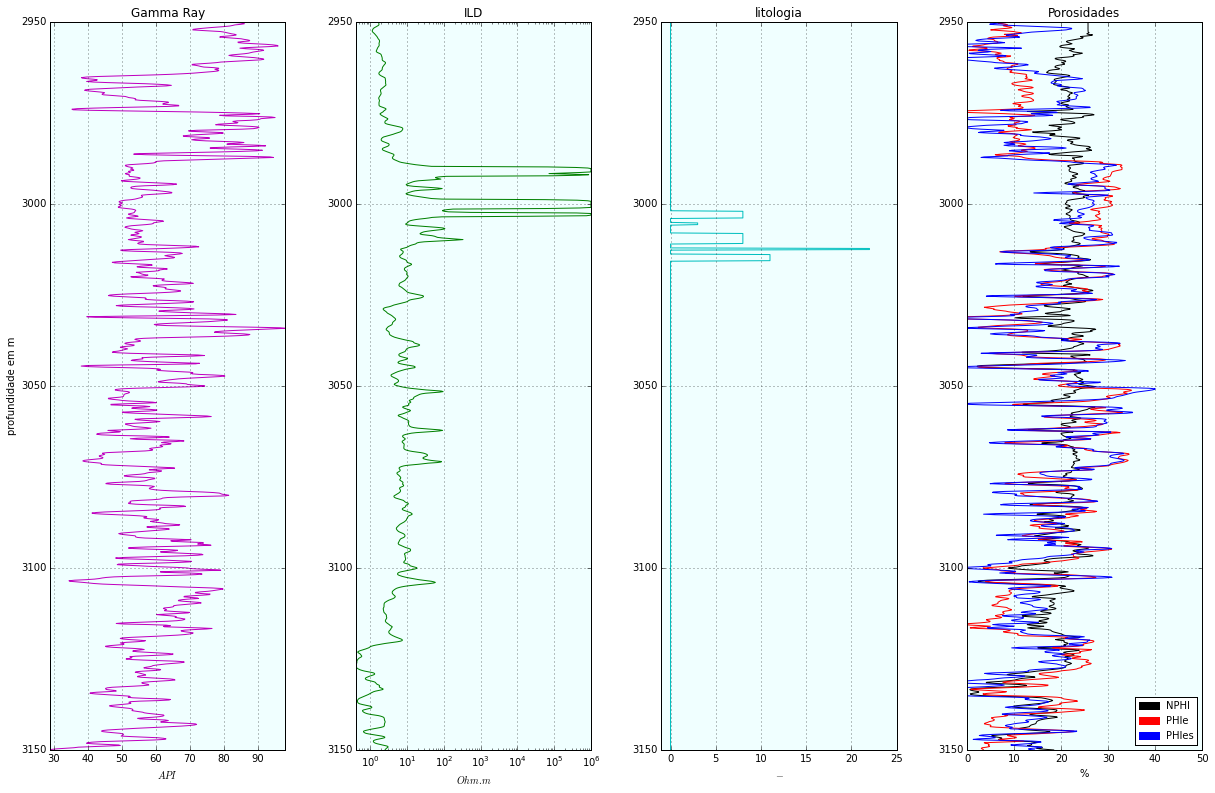

In [40]:
fig = plt.figure(figsize= (20,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')   

ax2.plot(GR,prof,'-m',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('Gamma Ray')                             # aqui o titulo 
ax2.set_xlabel('$API$')                     # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')              # aqui o que representa o eixo y

#                         # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(GR),xmin=min(GR))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#-------------------------------------------------------------------------------------------------#

ax2 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')   

ax2.semilogx(ILD,prof,'-g',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('ILD')                             # aqui o titulo 
ax2.set_xlabel('$Ohm.m$')                     

plt.xlim(xmax=max(ILD),xmin=min(ILD))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#---------------------------------------------------------------------------------------------------#

ax2 = fig.add_subplot(4,4,3, axisbg='#F0FFFF')   

ax2.plot(lit,prof,'-c',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('litologia')                             # aqui o titulo 
ax2.set_xlabel('$ - $')                     

plt.xlim(xmax=25,xmin=-1)     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#----------------------------------------------------------------------------------------------------#
ax2 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')   

ax2.plot(PHIN,prof,'-k',linewidth = 1)
ax2.plot(PHIe,prof,'-r',linewidth = 1)
#ax2.plot(PHItd,prof,'-m',linewidth = 1)
ax2.plot(PHIes,prof,'-b',linewidth = 1)
#ax2.plot(PHIts,prof,'-c',linewidth = 1)

ax2label1 = mpatches.Patch(label='NPHI',color='k')
ax2label2 = mpatches.Patch(label='PHIe',color='r')
ax2label3 = mpatches.Patch(label='PHIes',color='b')

ax2.set_title('Porosidades') 
ax2.set_xlabel('%')                     

plt.legend(handles=[ax2label1, ax2label2, ax2label3],loc=4,fontsize=10) # fontsize = tamanho da fonte
plt.xlim(xmax=50,xmin=0.0)     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

plt.show()

In [41]:
X = [354574.733]*p
Y = [7517375.468]*p

filef = np.array([[-999.000]*13]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTP    # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = PHIe   # porosidade efetiva densidade
filef[:,8] = PHIes  # porosidade efetiva sonico (se tiver)
filef[:,9] = z_imp  # Impedancia acustica
filef[:,10]= R      # Refletividade
filef[:,11]= signal # Sismograma sintetico
filef[:,12]= VP     # velocidade de onda P

np.savetxt('na01_mario2.dat', filef, delimiter=' ', fmt='%.4f')

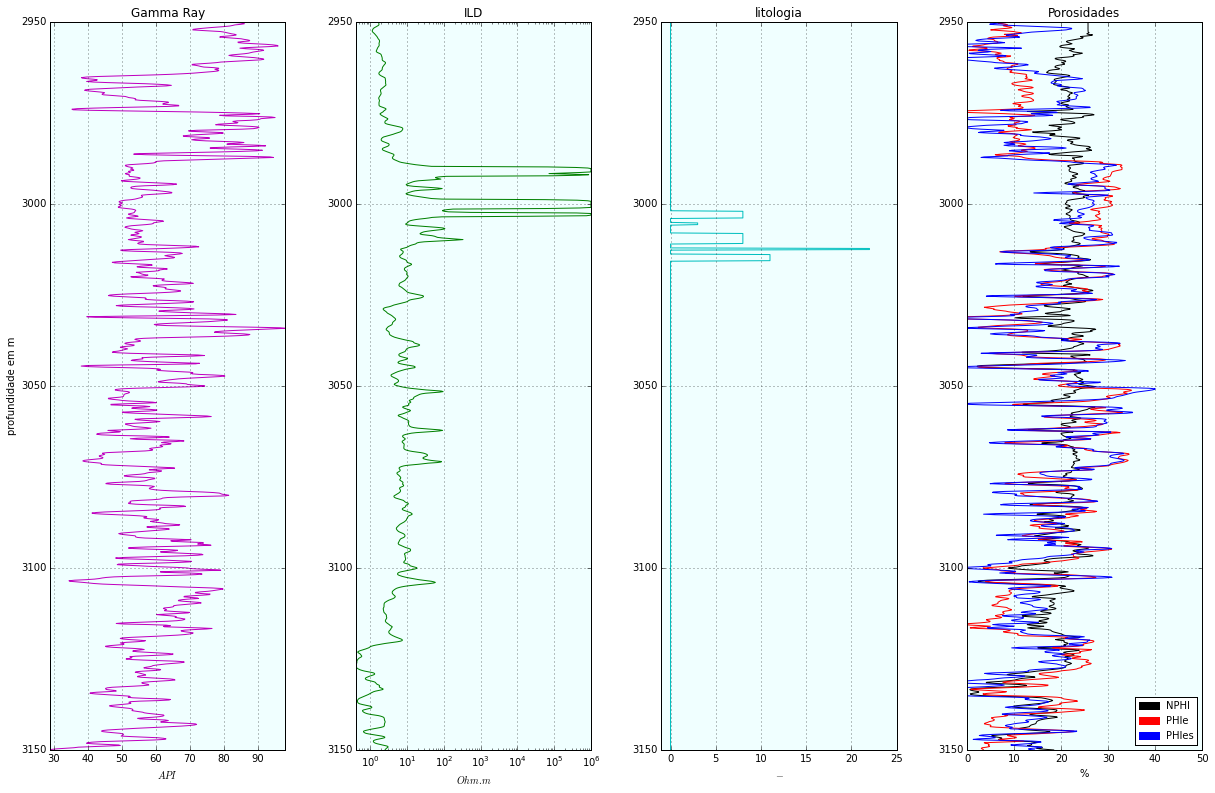

In [42]:
fig = plt.figure(figsize= (20,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')   

ax2.plot(GR,prof,'-m',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('Gamma Ray')                             # aqui o titulo 
ax2.set_xlabel('$API$')                     # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')              # aqui o que representa o eixo y

#                         # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(GR),xmin=min(GR))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#-------------------------------------------------------------------------------------------------#

ax2 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')   

ax2.semilogx(ILD,prof,'-g',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('ILD')                             # aqui o titulo 
ax2.set_xlabel('$Ohm.m$')                     

plt.xlim(xmax=max(ILD),xmin=min(ILD))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#---------------------------------------------------------------------------------------------------#

ax2 = fig.add_subplot(4,4,3, axisbg='#F0FFFF')   

ax2.plot(lit,prof,'-c',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('litologia')                             # aqui o titulo 
ax2.set_xlabel('$ - $')                     

plt.xlim(xmax=25,xmin=-1)     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#----------------------------------------------------------------------------------------------------#
ax2 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')   

ax2.plot(PHIN,prof,'-k',linewidth = 1)
ax2.plot(PHIe,prof,'-r',linewidth = 1)
#ax2.plot(PHItd,prof,'-m',linewidth = 1)
ax2.plot(PHIes,prof,'-b',linewidth = 1)
#ax2.plot(PHIts,prof,'-c',linewidth = 1)

ax2label1 = mpatches.Patch(label='NPHI',color='k')
ax2label2 = mpatches.Patch(label='PHIe',color='r')
ax2label3 = mpatches.Patch(label='PHIes',color='b')

ax2.set_title('Porosidades') 
ax2.set_xlabel('%')                     

plt.legend(handles=[ax2label1, ax2label2, ax2label3],loc=4,fontsize=10) # fontsize = tamanho da fonte
plt.xlim(xmax=50,xmin=0.0)     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

plt.show()

$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.63 − 9.82 \phi_{e,D} − 2.25 V_{sh} + 0.08 R_{ILD} + 4.06 (\phi_{e,D}. V_{sh}) −220.22 (\phi_{e,D} . R_{ILD}) + 1.92 × 10^{−3} (V_{sh} . R_{ILD}) + 17.18 \phi_{e,D}^2 + 1.26 V_{sh}^2 − 2.66 × 10^{−4} R_{ILD}^2 $

$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 3.89 − 5.11 \phi_{e,D} − 0.82 V_{sh} + 0.07 R_{ILD} + 1.11 \phi_{e,D} . V_{sh} −220.35 \phi_{e,D} . R_{ILD} + 9.16 × 10^{−3} V_{sh} . R_{ILD} + 15.40 \phi_{e,D}^2 + 0.23 V_{sh}^2 − 7.29 × 10^{−4} R_{ILD}^2$

$V_p(\phi_{e,D},V_{sh}) = 4.28 − 5.63 \phi_{e,D} − 2.74 V_{sh} + 9.24 (\phi_{e,D} . V_{sh}) + 26.76 \phi_{e,D}^2 + 0.85 V_{sh} $

NA-02$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.29 − 2.66 \phi_{e,D} − 1.78 V_{sh} − 5.38 × 10^{−5} R_{ILD}$

Na-04$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.43 − 4.05 \phi_{e,D} − 1.38 V_{sh} + 2.40 × 10^{−3} R_{ILD}$

$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.84 − 8.43 \phi_{e,D} − 5.52 V_{sh} + 18.78 \phi_{e,D} V_{sh} + 8.94 \phi_{e,D}^2 + 2.25 V_{sh}$

$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 3.90 − 5.07 \phi_{e,D} + 0.39 V_{sh} + 1.88 × 10^{−2} R_{ILD}$

-------------------------------------------------------------------------------------------

NA02 -> $\phi_N(GR,\rho_b) = 75.40 + 0.09.GR - 24.37 \rho_b $

-------------------------------------------------------------------------------------------

NA-08 -> $GR(R_{ILD},d) = 0.9 R_{ILD}*(-10.1251 d + 31402.5988)$  Onde d e a profundidade
<br>  -> $\phi_N (GR) = 133.73 - 2.08 GR + 0.01GR^2 $ - Augusto
<br>  -> $DTP (R_{ILD}) = 121.1671 -22.6412 R_{ILD} $ 
<br>  -> $\rho_b (GR,\phi_N,DTP) = 2.8082 + 0.0028 GR - 0.0100 \phi_N - 0.0034 DTP$

-------------------------------------------------------------------------------------------

NA-12 -> $GR (d) = -3615.8554 + 1.2542 d$
<br> -> $R_{ILD}(d) = 181.2967  - (6.0571×10^{-2} d)$
<br> -> $\phi_N (GR,R_{ILD}) = 37.66722541 + 0.05354099 GR  -6.16816206 R_{ILD}$
<br> -> $DTP(GR,R_{ILD},\phi_N) = 97.3134 - 3.5065×10^{-2} GR - 4.3964 R_{ILD} + 2.8932×10^{-1} \phi_N$
-b<br> -> $\rho_b (GR,R_{ILD},\phi_N) = 2.5989 + 3.63182196×10^{-4} GR + 5.0399×10^{-2} R_{ILD} - 1.5587×10^{-2} \phi_N$

-------------------------------------------------------------------------------------------

NA-15 -> $\rho_b (GR,R_{ILD}) = 1.9040 + 0.0028 GR + 0.2626 R_{ILD}$

-------------------------------------------------------------------------------------------

NA-18-> $\phi_N = 116.90 - 37.85 \rho_b $

-------------------------------------------------------------------------------------------

NA-20 - So tem metade dos dados
<br> NA-26 - So tem metade dos dados
<br> NA-29 - So tem metade dos dados
<br> NA-30 - So tem metade dos dados
<br> NA-41 - So tem parte inferior dos dados

-------------------------------------------------------------------------------------------

NA-42 -> Media de ILD, PHIN e RHOb

-------------------------------------------------------------------------------------------

NA-45 -> 
<br> -> $R_{ILD}(GR) = 2.4351 - 0.0119 GR$
<br> -> $\phi_N (GR,R_{ILD}) = 26.2989 + 0.1457 GR - 7.6686 R_{ILD}$
<br> -> $\rho_b (GR,R_{ILD}) = 2.5316 - 1.3056×10^{-3} GR + 3.8404×10^{-2} R_{ILD} $

-------------------------------------------------------------------------------------------

NA-49 ->
<br> -> $R_{ILD}(GR) = 1.6465 - 9.0539×10^{-4} GR $
<br> -> $\phi_N (GR,R_{ILD}) = 39.7933 + 0.0424 GR - 8.9631 R_{ILD}$
<br> -> $\rho_b (GR,R_{ILD}) = 2.2635 + 4.1796×10^{-4} GR + 9.37299459×10^{-2} R_{ILD}$

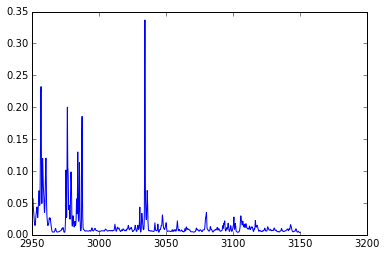

In [43]:
# ----------------------------- Calculos da Argilosidade -----------------------------------

VSHa = []   #Argilosidade Schlumberger
VSHc = []   #Argilosidade Larinov

CEC  = []   # Capacidade de Troca cationica

psh_00  = []   # Densidade do Folhelho
dtsh = []   # Vagarosidade do Folhelho

phi_test_s = [] # porosidade total obtida pelo perfil sonico
phi_test_d = [] # porosidade total obtida pelo perfil densidade

for i in range (p):
    VSH1 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    VSHa.append(VSH1)

    Larinov1 = 0.083*((2**(3.70*VSH1))-1)        # Correcao de Larinov para Argilosidade
    VSHc.append(Larinov1)
    
    CEC1 = 10**((1.9832*Larinov1) - 2.4473)      # Capacidade de troca cationica
    
    if 0.8 <= CEC1 <= 1.5: # Calculo condicional da densidade do folhelho...
        psh1 = 2.12        # ... a partir da Capacidade de Troca Cationica
    if 0.1 <= CEC1 <= 0.4: 
        psh1 = 2.52
    if 0.03 <= CEC1 <= 0.1:
        psh1 = 2.41
    if CEC1 <= 0.03:
        psh1 = 2.77
        
    CEC.append(CEC1)
    
plt.plot(prof,CEC)
plt.show()

<br>A1-Illite + C1-Clorita + D1-Calcite + F1-Quartz = T1(porosidade neutronica)
<br>A2-Illite + C2-Clorita + D2-Calcite + F2-Quartz = T2(vagarosidade)
<br>A3-Illite + C3-Clorita + D3-Calcite + F3-Quartz = T3(Raio gamma)
<br>A4-Illite + C4-Clorita + D4-Calcite + F4-Quartz = T4(densidade)

[A1 C1 D1 F1]    [Illite      [T1
[A2 C2 D2 F2]     Clorita      T2
[A3 C3 D3 F3] X   Calcite  =   T3
[A4 C4 D4 F4]     Quartzo      T4]
       4 x 1       1 X 4

MxY = Z
Y = Z.M(-1)

In [44]:
'''
ELLAN_M  = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)
ELLAN_IL = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)
ELLAN_CL = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)
ELLAN_CA = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)
ELLAN_QZ = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)

VEC = np.array([PHIN[500],DTP[500],GR[500],RHOb[500]],float)

ELLAN_IL[:,0] = VEC
ELLAN_CL[:,1] = VEC
ELLAN_CA[:,2] = VEC
ELLAN_QZ[:,3] = VEC

det_M  = np.linalg.det(ELLAN_M)
det_IL = np.linalg.det(ELLAN_IL)
det_CL = np.linalg.det(ELLAN_CL)
det_CA = np.linalg.det(ELLAN_CA)
det_QZ = np.linalg.det(ELLAN_QZ)

print det_M, det_IL, det_CL, det_CA, det_QZ

IL = det_IL/det_M
CL = det_CL/det_M
CA = det_CA/det_M
QZ = det_QZ/det_M

print IL, CL, CA, QZ

#ELLAN_MI = np.linalg.inv(ELLAN_M)
#Y = np.dot(ELLAN_MI,VEC)
'''

'\nELLAN_M  = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)\nELLAN_IL = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)\nELLAN_CL = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)\nELLAN_CA = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)\nELLAN_QZ = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)\n\nVEC = np.array([PHIN[500],DTP[500],GR[500],RHOb[500]],float)\n\nELLAN_IL[:,0] = VEC\nELLAN_CL[:,1] = VEC\nELLAN_CA[:,2] = VEC\nELLAN_QZ[:,3] = VEC\n\ndet_M  = np.linalg.det(ELLAN_M)\ndet_IL = np.linalg.det(ELLAN_IL)\ndet_CL = np.linalg.det(ELLAN_CL)\ndet_CA = np.linalg.det(ELLAN_CA)\ndet_QZ = np.linalg.det(ELLAN_QZ)\n\nprint det_M, det_IL, det_CL, det_CA, det_QZ\n\nIL = det_IL/det_M\nCL = det_CL/det_M\nCA = det_CA/det_M\nQZ = det_Q

In [45]:

ELLAN_M  = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)
ELLAN_IL = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)
ELLAN_CL = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)
ELLAN_CA = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)
ELLAN_QZ = np.array([[0.352,0.583,0.000,0.000],[130,80,47.8,55.5],[160,74,11,20],[2.61,2.81,2.71,2.65]],float)

IL = []
CL = []
CA = []
QZ = []

for i in range (p):
    VEC = np.array([PHIN[i],DTP[i],GR[i],RHOb[i]],float)
    
    ELLAN_IL[:,0] = VEC
    ELLAN_CL[:,1] = VEC
    ELLAN_CA[:,2] = VEC
    ELLAN_QZ[:,3] = VEC
    
    det_M  = np.linalg.det(ELLAN_M)
    det_IL = np.linalg.det(ELLAN_IL)
    det_CL = np.linalg.det(ELLAN_CL)
    det_CA = np.linalg.det(ELLAN_CA)
    det_QZ = np.linalg.det(ELLAN_QZ)
    
    IL.append(det_IL/det_M)
    CL.append(det_CL/det_M)
    CA.append(det_CA/det_M)
    QZ.append(det_QZ/det_M)


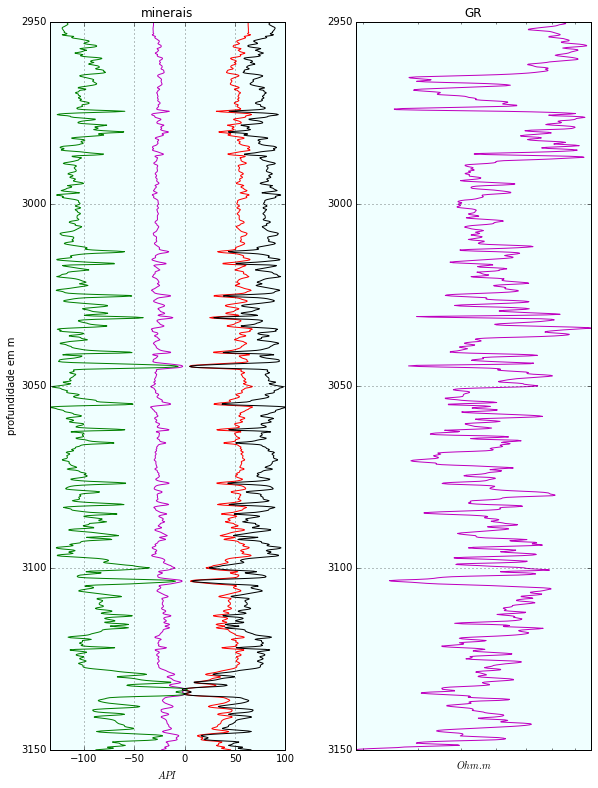

In [46]:
fig = plt.figure(figsize= (20,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')   

ax2.plot(IL,prof,'-m',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)
ax2.plot(CL,prof,'-r',linewidth = 1)
ax2.plot(CA,prof,'-g',linewidth = 1)
ax2.plot(QZ,prof,'-k',linewidth = 1)

ax2.set_title('minerais')                             # aqui o titulo 
ax2.set_xlabel('$API$')                     # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')              # aqui o que representa o eixo y

#                         # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(QZ),xmin=min(CA))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#-------------------------------------------------------#

ax2 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')   

ax2.semilogx(GR,prof,'-m',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('GR')                             # aqui o titulo 
ax2.set_xlabel('$Ohm.m$')                     

plt.xlim(xmax=max(GR),xmin=min(GR))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()



plt.show()

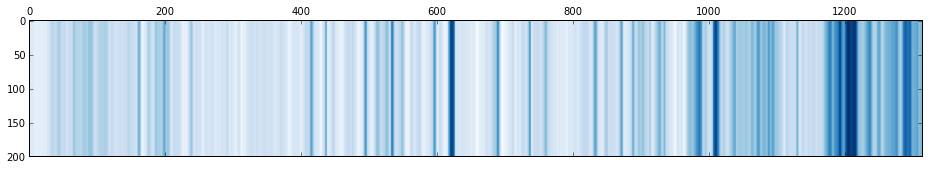

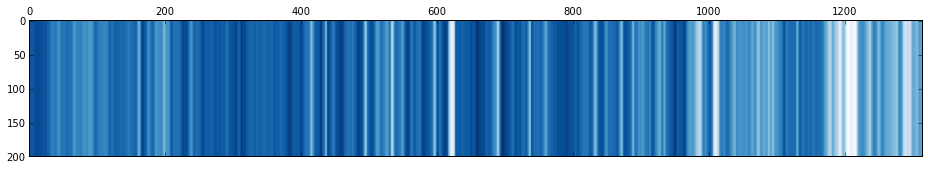

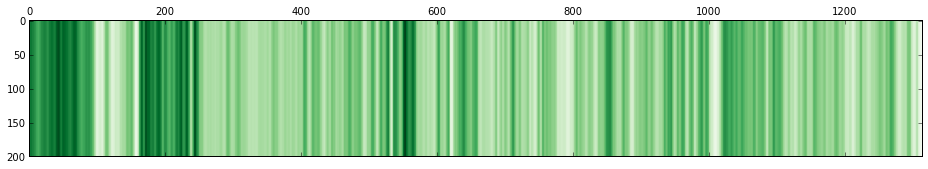

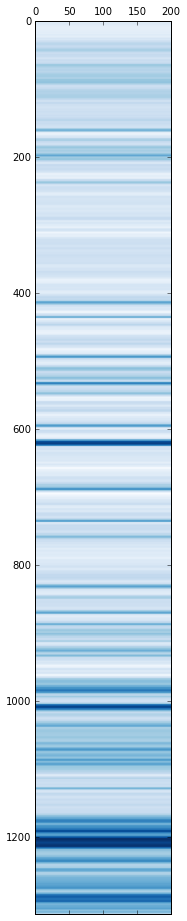

In [47]:
CA2 = [CA]*200
QZ2 = [QZ]*200
GR2 = [GR]*200

matshow(CA2,cmap='Blues')
show()

matshow(QZ2,cmap='Blues')
show()

matshow(GR2,cmap='Greens')
show()

CA3 = np.transpose(CA2)

matshow(CA3,cmap='Blues')
show()

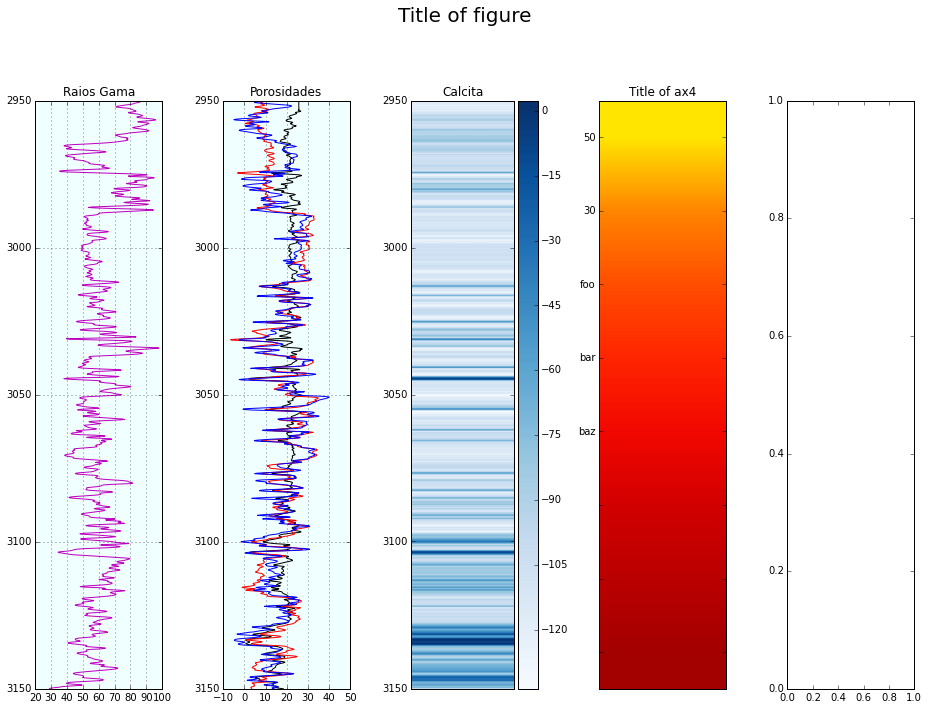

In [48]:
s = {'t': 1,
     'x': [1, 2, 3, 4, 5, 6, 7, 8],
     'T': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
     'D': [0.3, 0.5, 0.2, 0.3, 0.5, 0.5, 0.3, 0.4]}

width = 40

tot = np.repeat(s['D'],width).reshape(len(s['D']), width)
tot2 = np.repeat(s['T'],width).reshape(len(s['D']), width)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('Title of figure', fontsize=20)
fig.set_size_inches(13, 10)

# Line plots
ax1.set_title('Raios Gama')
ax1.plot(GR, prof,'-m')
ax1.set_ylim(2950,3150)
ax1.invert_yaxis()
ax1.set_axis_bgcolor('#F0FFFF')
ax1.grid()

#----------------------------------------------------------------------#

ax2.set_title('Porosidades')
ax2.plot(PHIN,prof,'-k',linewidth = 1)
ax2.plot(PHIe,prof,'-r',linewidth = 1)
ax2.plot(PHIes,prof,'-b',linewidth = 1)
ax2.set_ylim(2950,3150)
ax2.invert_yaxis()
ax2.set_axis_bgcolor('#F0FFFF')
ax2.grid()

#----------------------------------------------------------------------#

ax3.set_title('Calcita')
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im3 = ax3.imshow(CA3, aspect='auto',cmap='Blues')
# Create divider for existing axes instance
divider3 = make_axes_locatable(ax3)
# Append axes to the right of ax3, with 20% width of ax3
cax3 = divider3.append_axes("right", size="20%", pad=0.05)
# Create colorbar in the appended axes
# Tick locations can be set with the kwarg `ticks`
# and the format of the ticklabels with kwarg `format`
cbar3 = plt.colorbar(im3, cax=cax3)
# Remove xticks from ax3
ax3.xaxis.set_visible(False)
# Manually set ticklocations
ax3.set_yticks((0,p/4,p/2,(3*p)/4,p)) # botar os valores originais
ax3.set_yticklabels([2950,3000,3050,3100,3150])#[2950,3000,3050,3100,3150]

#----------------------------------------------------------------------#

ax4.set_title('Title of ax4')
im4 = ax4.imshow(tot2, norm=LogNorm(vmin=0.001, vmax=1), aspect='auto')
divider4 = make_axes_locatable(ax4)
ax4.xaxis.set_visible(False)
# Manually set ticklabels (not ticklocations, they remain unchanged)
ax4.set_yticklabels([0, 50, 30, 'foo', 'bar', 'baz'])

#----------------------------------------------------------------------#

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

In [49]:
#---------------------------------------------------Litologia NA-01----------------------------------------------------#
are = [0]*p
sil = [0]*p
mar = [0]*p
arg = [0]*p
mao = [0]*p


for i in range (p):
    if prof[i] >= 2986.7470 and prof[i] < 2994.0000:
        sil[i] = 70
    #----------------------------------------------#
    if prof[i] >= 2994.0000 and prof[i] < 3012.8931:
        are[i] = 90
    if prof[i] >= 3014.7799 and prof[i] < 3025.7862:
        are[i] = 90
    if prof[i] >= 3027.7862 and prof[i] < 3029.4862:
        are[i] = 90
    if prof[i] >= 3037.6862 and prof[i] < 3040.6862:
        are[i] = 90
    if prof[i] >= 3042.4862 and prof[i] < 3050.0000:
        are[i] = 90
    if prof[i] >= 3052.0080 and prof[i] < 3059.2369:
        are[i] = 90
    if prof[i] >= 3061.8072 and prof[i] < 3065.8635:
        are[i] = 90
    if prof[i] >= 3067.2961 and prof[i] < 3070.8835:
        are[i] = 90
    if prof[i] >= 3072.6908 and prof[i] < 3082.1285:
        are[i] = 90
    if prof[i] >= 3083.9357 and prof[i] < 3096.7871:
        are[i] = 90
    if prof[i] >= 3098.7952 and prof[i] < 3105.2209:
        are[i] = 90
    if prof[i] >= 3106.4257 and prof[i] < 3109.2369:
        are[i] = 90
    if prof[i] >= 3111.4458 and prof[i] < 3113.4538:
        are[i] = 90
    if prof[i] >= 3124.6988 and prof[i] < 3137.9518:
        are[i] = 90
    if prof[i] >= 3142.1687 and prof[i] < 3147.5904:
        are[i] = 90
    #----------------------------------------------#
    if prof[i] >= 3025.7862 and prof[i] < 3027.7862:
        mar[i] = 60
    if prof[i] >= 3031.8862 and prof[i] < 3033.6862:
        mar[i] = 60
    if prof[i] >= 3040.6862 and prof[i] < 3042.4862:
        mar[i] = 60
    if prof[i] >= 3050.0000 and prof[i] < 3052.0080:
        mar[i] = 60
    if prof[i] >= 3059.2369 and prof[i] < 3061.8072:
        mar[i] = 60
    if prof[i] >= 3065.8635 and prof[i] < 3067.2691:
        mar[i] = 60
    if prof[i] >= 3070.8835 and prof[i] < 3072.6908:
        mar[i] = 60
    if prof[i] >= 3082.1285 and prof[i] < 3083.9357:
        mar[i] = 60
    if prof[i] >= 3096.7871 and prof[i] < 3098.7952:
        mar[i] = 60
    if prof[i] >= 3105.2209 and prof[i] < 3106.4257:
        mar[i] = 60
    if prof[i] >= 3109.2369 and prof[i] < 3111.4458:
        mar[i] = 60
    if prof[i] >= 3137.9518 and prof[i] < 3142.1687:
        mar[i] = 60
    #----------------------------------------------#
    if prof[i] >= 3029.4862 and prof[i] < 3031.8862:
        arg[i] = 50
    if prof[i] >= 3033.6862 and prof[i] < 3037.6862:
        arg[i] = 50
    if prof[i] >= 3012.8931 and prof[i] < 3014.7799:
        arg[i] = 50
    if prof[i] >= 3116.2651 and prof[i] < 3119.6787:
        arg[i] = 50
    #----------------------------------------------#
    if prof[i] >= 3113.4538 and prof[i] < 3116.2651:
        mao[i] = 60
    if prof[i] >= 3119.6787 and prof[i] < 3124.6988:
        mao[i] = 60
    if prof[i] >= 3147.5904 and prof[i] < 3150.0000:
        mao[i] = 60
        
#-----------------------------------------------------Granulometria------------------------------------------------------#
arem = [1e-6]*p #are - Areia media
silt = [1e-6]*p #sil - silte
shal = [1e-6]*p #arg - Argila

calu = [1e-6]*p # mar - Calcilutito
marl = [1e-6]*p # mao - Marga

for i in range(p):
    if are[i] == 90:
        arem[i] = 0.375
    if sil[i] == 70:
        silt[i] = 0.033
    if arg[i] == 50:
        shal[i] = 0.016
    if mar[i] == 60:
        calu[i] = 0.002
    if mao[i] == 60:
        marl[i] = 0.002

In [50]:
M  = np.array([[185.0,55.50,96.00,48.100,85.0],
               [1.10,2.650,2.540,2.710,2.56],
               [0.0,1.00,171.00,12.00,59.0],
               [100.0,-0.018,-0.006,0.002,0.24],
               [1,1,1,1,1]],float)

#print M

V = []
for i in range (p):
    r = np.array([DTP[i],RHOb[i],GR[i],PHIN[i],1],float)

    v = np.dot(np.linalg.inv(M),r)
    
    v2 = [0.0]*len(v)
    v3 = [0.0]*len(v)
    for j in range (len(v)):
        v2[j] = v[j]+(min(v)*(-1))
    #print v2
    
    for j in range (len(v)):
        v3[j] = v2[j]/sum(v2)
    
    V.append(v)
    #print v,sum(v)
    

VM = np.array(V)

print VM[:,0]

[ 0.25113427  0.24953568  0.24910264 ...,  0.14645298  0.16141139
  0.17505443]


In [51]:
flu = []
qtz = []
fld = []
cao = []
sha = []
for i in range (p):
    flu.append(VM[i,0] - min(VM[:,0]))
    qtz.append(VM[i,1] - min(VM[:,1]))
    fld.append(VM[i,2] - min(VM[:,2]))
    cao.append(VM[i,3] - min(VM[:,3]))
    sha.append(VM[i,4] - min(VM[:,4]))
  
    
flu_c = [0.0]*p
qtz_c = [0.0]*p
fld_c = [0.0]*p
cao_c = [0.0]*p
sha_c = [0.0]*p

for i in range (p):
    flu_c[i] = flu[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    qtz_c[i] = qtz[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    fld_c[i] = fld[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    cao_c[i] = cao[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    sha_c[i] = sha[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])

In [55]:
arem2 = [0]*p #are - Areia media
silt2 = [0]*p #sil - silte
shal2 = [0]*p #arg - Argila

calu2 = [0]*p # mar - Calcilutito
marl2 = [0]*p # mao - Marga

for i in range (p):
    if qtz_c[i] > cao_c[i] and qtz_c[i] > sha_c[i] and sha_c[i] > cao_c[i]:
        arem2[i] = 90
    #---------------------------------------------#
    if qtz_c[i] < cao_c[i] and qtz_c[i] < sha_c[i] and sha_c[i] < cao_c[i]:
        calu2[i] = 60
    #---------------------------------------------#
    if qtz_c[i] < cao_c[i] and qtz_c[i] < sha_c[i] and sha_c[i] > cao_c[i]:
        silt2[i] = 80
    #---------------------------------------------#
    if qtz_c[i] > cao_c[i] and qtz_c[i] < sha_c[i] and sha_c[i] > cao_c[i]:
        shal2[i] = 70

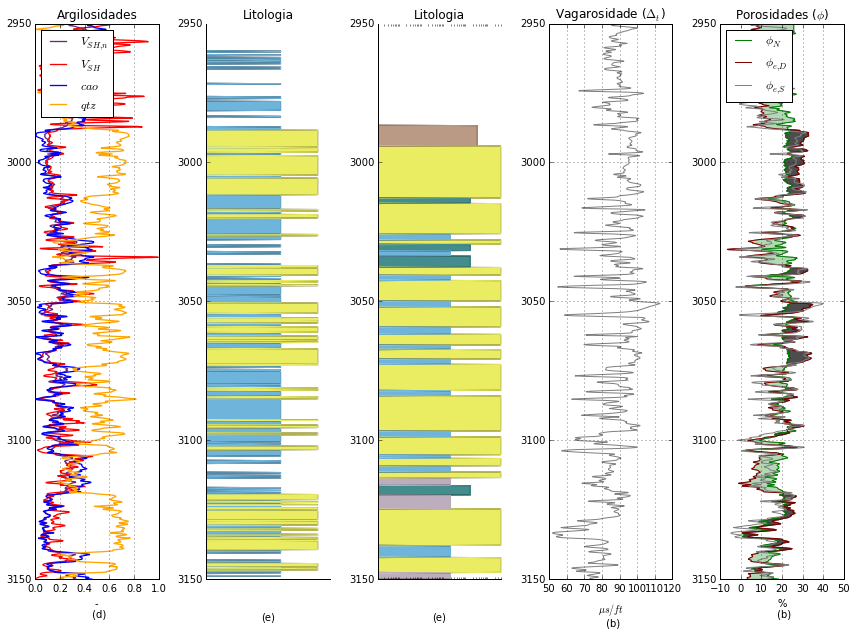

In [57]:
#--------------------------------------------------------Graficos--------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)

#--------------------------------------------------------------------------------------------------#
ax1.plot(sha_c,prof,'-',linewidth = 1.3,color='#6A287E',label='$V_{SH,n}$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='red',label='$V_{SH}$')
ax1.plot(cao_c,prof,'-',linewidth = 1.3,color='blue',label='$cao$')
ax1.plot(qtz_c,prof,'-',linewidth = 1.3,color='orange',label='$qtz$')
ax1.set_title(u'Argilosidades')

ax1.set_xlabel('- \n (d)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis()
ax1.grid()

ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#

#ax2.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax2.plot(shal2,prof,'-',linewidth = 1,color='#438d8e')
ax2.plot(calu2,prof,'-',linewidth = 1,color='#6fb5db')
ax2.plot(arem2,prof,'-',linewidth = 1,color='#eaec61')
#ax2.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')


ax2.fill_betweenx(prof, silt2, facecolor='#bb9a85')
ax2.fill_betweenx(prof, shal2, facecolor='#438d8e')
ax2.fill_betweenx(prof, calu2, facecolor='#6fb5db')
ax2.fill_betweenx(prof, arem2, facecolor='#eaec61')
#ax2.fill_betweenx(prof, marl, facecolor='#bdaebe')

ax2.set_title('Litologia')                       
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.set_xlim(xmax=100,xmin=0)

ax2.invert_yaxis()

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax3.spines['bottom'].set_visible(False)

ax2.yaxis.set_ticks_position('left')
ax2.axes.get_xaxis().set_ticks([])

ax2.set_xlabel('(e)')
ax2.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61')
ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e')
ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')

ax3.fill_betweenx(prof, arem, facecolor='#eaec61')
ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e')
ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')

ax3.set_title('Litologia')                       
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.4,xmin=0)

ax3.invert_yaxis()

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax3.spines['bottom'].set_visible(False)

ax3.yaxis.set_ticks_position('left')
ax3.axes.get_xaxis().set_ticks([])

ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$')


ax4.set_title('Vagarosidade ($\Delta _t$)')                      
ax4.set_xlabel('$\mu s / ft$ \n (b)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.invert_yaxis()
ax4.grid()

#ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIe  ,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e,D}$')
ax5.plot(PHIes ,prof,'-',linewidth = 1,color='Gray'  ,label='$\phi_{e,S}$')

ax5.set_title('Porosidades ($\phi$)')                      
ax5.set_xlabel('% \n (b)')
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis()
ax5.grid()

ax5.fill_betweenx(prof, PHIN, PHIe, where=PHIN>PHIe, facecolor='Green' , alpha=0.3)
ax5.fill_betweenx(prof, PHIN, PHIe, where=PHIe>PHIN, facecolor='Black' , alpha=0.7)

ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#


plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

#--------------------------------------------------------------------------------------------------#